# Telecom Churn Prediction

 > Developers - <br>
 1. Munirathinam Duraisamy : munirathinamd1985@gmail.com<br>
 2. Sreedhar K : cpadmaja2003@gmail.com

# Problem Statement

> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

> For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

> In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


# Problem data
<br>
<a href="https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c41/overview">Competition link</a>
</br>
<br>
<a href="https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c41/data">Dataset</a>
<br>
<br>


# Business Objective
> The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:
<br>
1) It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
<br>
2) It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
<br>
3) Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.
<br>
4) Recommend strategies to manage customer churn based on your observations.

 ## Steps:
 
1. [EDA](#EDA)<br>
<ul>
    <li>Load library</li>
    <li>Data Load</li>
    <li>Data Overview</li>
    <li>Metadata Information</li>
</ul>
2. [Data_Cleaning_and_Missing_Data_Analysis](#Data_Cleaning_and_Missing_Data_Analysis)<br>
3. [Outlier Analysis & Treatment Assumption values > Q3+1.5IQR and values < Q1-1.5IQR will be treated](#Outlier_Analysis_and_Treatment_Assumption_values)<br>
4. [Transforming_Categorical_Columns](#Transforming_Categorical_Columns)<br>
<ul>
    <li>Filter High-Value Customers</li>
    <ul>
        <li>calculate total data recharge amount</li>
    </ul>
    <li>Display the correlation matrix again to analyze correlation coefficient between features</li>
</ul>
5. [Univariate_Analysis](#Univariate_Analysis)<br>
6. [Bivariate_Analysis](#Bivariate_Analysis)<br>


7. [Model Preparation](#Model_Preparation)
    - [Case 1](#Case1) : 
    - - [Split train data into train and test split](#Data_Split)
    - - [Feature Scaling - StandardScaler](#Feature_Scaling)
    - - [Handle Imbalance dataset using SMOTE](#Handle_Imbalance_Dataset_Using_SMOTE)
    - - [Model Creation](#Model_Creation)
    - - - [Model 1 : LOGISTICREGRESSION Without Hyperparameter Tuning](#Model_1_Logistic_Regression_Without_Hyperparameter_Tuning)
    - - - [Model 2 : LOGISTICREGRESSION With Hyperparameter Tuning](#Model_2_Logistic_Regression_With_Hyperparameter_Tuning)
    - - - [Model 3 : RANDOMFOREST Without Hyperparameter Tuning](#Model_3_Random_Forest_Without_Hyperparameter_Tuning)
    - - - [Model 4 : RANDOMFOREST With Hyperparameter Tuning](#Model_4_Random_Forest_With_Hyperparameter_Tuning)
    - - - [Model 5: Adaboost](#MODEL_5_ADABOOST)
    - - - [Model 6 : ADABOOST without using PCA](#Model_6_Adaboost_without_using_PCA)
    - - - [Model 7 : ADABOOST without using PCA and with Hyperparameter Tuning](#Model_7_ADABOOST_without_using_PCA_and_with_Hyperparameter_Tuning)
    - - - [Model 8: XGBOOST](#MODEL_8_XGBOOST)
    - - - [Model 9 : XGBOOST with Hyperparameter Tuning](#Model_9_XGBOOST_with_Hyperparameter_Tuning)
    - - [Derive output of all models and predict test data based on the combination](#Derive_output_of_all_models_and_predict_test_data_based_on_the_combination)
    - [Case 2](#Case_2) : 
    - - [Use entire train dataset for model building using K Cross Validation](#Apply_Algorithms_on_X_and_Y_train_directly)
    - - [Feature Scaling - StandardScaler](#Feature_Scaling_1)
    - - [Handle Imbalance dataset using SMOTE](#Handle_Imbalance_Dataset_Using_SMOTE_1)
    - - [Created below models on entire train set](#Created_below_models_on_entire_train_set)
    - - - [RANDOMFOREST](#Random_Forest_1)
    - - - [ADABOOST](#AdaBoost_1)
    - - - [XGBBOOST](#XGBOOST_1)
    - - [Made predictions by using combination of Random Forest + Adaboost + XGBOOST](#Predict_test_results_based_on_multiple_model_outputs)
8. [Conclusion & Analysis](#Conclusion)

<hr>
<hr>

<h1><a id='EDA'>EDA</a><br></h1>
<ul>
    <li>Load library</li>
    <li>Data Load</li>
    <li>Data Overview</li>
    <li>Metadata Information</li>
</ul>


# Import Libraries

In [188]:
#Importing reqried libraries
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display,HTML

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from xgboost import XGBClassifier
import imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import sensitivity_specificity_support

import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls

# Data Load

In [2]:
#Loading data into data frame
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data Overview

In [3]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [4]:
#Displaying the first 10 records with all columns
data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [5]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [6]:
#Check the column data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [7]:
#Get DF Shape
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])

Rows     :  69999
Columns  :  172


# Metadata Information

In [8]:
# List the Features
print (data.columns.tolist())


['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_

In [9]:
#Check the missing values
data.isnull().sum().values.sum()

1835086

In [10]:
#Check the unique values
data.nunique()

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [11]:
# Number of rows have the all null values

print("Number of rows have null values in all columns= {} ".format(data.isnull().all(axis=1).sum()))

Number of rows have null values in all columns= 0 


In [12]:
# Number of colummns have the all null values

print("Number of colummns have the all null values = {}".format(data.isnull().all(axis=0).sum()))

Number of colummns have the all null values = 0


In [13]:
# Check Duplicate Rows

data[data.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


<hr>
<h1><a id='Data_Cleaning_and_Missing_Data_Analysis'>Data Cleaning and Missing Data Analysis</a><br></h1>
<ul>
    <li>Data_Cleaning</li>
    <li>Missing Data Treatment Analysis</li>
</ul>

In [14]:
# Lets do EDA and further activities without disturbing the orginal dataset.
# As we are doing data treatment, we will do for both train and test data
#Droping id as it has only unique values
# Dropping listed columns as these columns have only single value : 'circle_id', loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8

test_v1 = test.drop(columns=['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

data_v1 = data.drop(columns=['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                               'std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

In [15]:
display(data_v1.shape)

(69999, 161)

##### We are now having 69999 rows and 161 columns

In [16]:
# Percentage of Missing values in all Columns
pd.options.display.max_rows = None 
round(100 * data_v1.isnull().sum()/len(data_v1.index),2).sort_values(ascending=False)

total_rech_data_6           74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
max_rech_data_6             74.90
night_pck_user_6            74.90
arpu_3g_6                   74.90
av_rech_amt_data_6          74.90
fb_user_6                   74.90
count_rech_3g_6             74.90
count_rech_2g_6             74.90
count_rech_2g_7             74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
night_pck_user_7            74.48
arpu_3g_7                   74.48
date_of_last_rech_data_7    74.48
av_rech_amt_data_7          74.48
fb_user_7                   74.48
arpu_2g_7                   74.48
count_rech_3g_7             74.48
night_pck_user_8            73.69
fb_user_8                   73.69
date_of_last_rech_data_8    73.69
max_rech_data_8             73.69
count_rech_2g_8             73.69
arpu_3g_8                   73.69
count_rech_3g_8             73.69
arpu_2g_8                   73.69
total_rech_data_8           73.69
av_rech_amt_da

In [17]:
#Segregating categorical , continuous and date columns
catg = []
cont = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        catg.append(i)
    else:
        cont.append(i)

dtcols = catg

catg = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

cont = [column for column in cont if column not in catg]

display("Numerical Columns" ,len(cont),"Categorical Columns",len(catg),"Date Columns" ,len(dtcols))

'Numerical Columns'

134

'Categorical Columns'

18

'Date Columns'

9

## Insights of Missing Data Treatment ##

> ### Replacing null value with -1 for below variables assuming no recharge has been made
- - 'night_pck_user_6', 'night_pck_user_8', 'night_pck_user_7','fb_user_6', 'fb_user_7', 'fb_user_8'

> ### Replacing null value with 0 for all recharge amount columns assuming no recharge has been made. As its amount column, better to keep value 0 for further analysis

- - 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'

> ### Imputing Count recharge columns with 0 considering no recharge has been made by the customer

- - 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'



> ### As % of missing values are more than 70% and also not adding values to our analysis, dropping below columns

- - 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7','arpu_2g_8'

> ### Dropping below date columns as it has same value and will not be used much. For other date columns will calculate age
- - 'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8'
> ### Replacing Missing age data with -1 considering no recharge has been made by the user

- - 'date_of_last_rech_6age', 'date_of_last_rech_7age', 'date_of_last_rech_8age','date_of_last_rech_data_6age', 'date_of_last_rech_data_7age','date_of_last_rech_data_8age'


> ### For other Continuous columns missing values has been replaced with median since we have outliers

In [18]:
# Replacing null value with -1 for below variables assuming no recharge has been made

data_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
data_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
data_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
data_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
data_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
data_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

test_v1['night_pck_user_6'] = data_v1['night_pck_user_6'].fillna(-1)
test_v1['night_pck_user_7'] = data_v1['night_pck_user_7'].fillna(-1)
test_v1['night_pck_user_8'] = data_v1['night_pck_user_8'].fillna(-1)
test_v1['fb_user_6'] = data_v1['fb_user_6'].fillna(-1)
test_v1['fb_user_7'] = data_v1['fb_user_7'].fillna(-1)
test_v1['fb_user_8'] = data_v1['fb_user_8'].fillna(-1)

In [19]:
#Replacing null value with 0 for all recharge amount columns assuming no recharge has been made. As its amount column, better to keep value 0 for further analysis
rchrg_amt_col=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

for column in rchrg_amt_col:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)


In [20]:
# Check % of missing values after the replacing
round(100 * data_v1[rchrg_amt_col].isnull().sum()/len(data_v1.index),2)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [21]:
# Imputing Count recharge columns with 0 considering no recharge has been made by the customer

count_col = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']

for column in count_col:
    data_v1[column] = data_v1[column].fillna(0)
    test_v1[column] = test_v1[column].fillna(0)

# Re-check % of missing values after the imputation
round(100 * data_v1[count_col].isnull().sum()/len(data_v1.index),2)

count_rech_2g_6    0.0
count_rech_2g_7    0.0
count_rech_2g_8    0.0
count_rech_3g_6    0.0
count_rech_3g_7    0.0
count_rech_3g_8    0.0
dtype: float64

In [22]:
#As % of missing values are more than 70% and also not adding values to our analysis, dropping below columns
data_v1 = data_v1.drop(columns=['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7','arpu_2g_8'],axis=1)
test_v1 = test_v1.drop(columns=['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7','arpu_2g_8'],axis=1)


In [23]:
#Dropping below date columns as it has unique data and will not be in use much 

data_v1 = data_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)
test_v1 = test_v1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [24]:
dtcols.remove('last_date_of_month_6')
dtcols.remove('last_date_of_month_7')
dtcols.remove('last_date_of_month_8')

In [25]:
test_v1[dtcols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/26/2014,8/24/2014,NaN,NaN,NaN
1,6/19/2014,7/16/2014,8/24/2014,NaN,NaN,NaN
2,6/29/2014,7/27/2014,8/28/2014,NaN,NaN,NaN
3,6/25/2014,7/30/2014,8/24/2014,NaN,NaN,NaN
4,6/29/2014,7/29/2014,8/30/2014,NaN,NaN,NaN


In [26]:
# compute age on above date columns.
# Replace missing age data with -1 considering no recharge has been made

for column in dtcols:
    colstr = column + 'age'
    display(colstr)
    data_v1[column] = pd.to_datetime(data_v1[column])
    data_v1[colstr] = data_v1[column].max() - data_v1[column]
    data_v1[colstr] = data_v1[colstr].dt.days
    data_v1 = data_v1.drop(columns=column,axis=1)
    data_v1[colstr] = data_v1[colstr].fillna(-1)
    

for column in dtcols:
    colstr = column + 'age'
    display(colstr)
    test_v1[column] = pd.to_datetime(test_v1[column])
    test_v1[colstr] = test_v1[column].max() - test_v1[column]
    test_v1[colstr] = test_v1[colstr].dt.days
    test_v1 = test_v1.drop(columns=column,axis=1)
    test_v1[colstr] = test_v1[colstr].fillna(-1)
    

'date_of_last_rech_6age'

'date_of_last_rech_7age'

'date_of_last_rech_8age'

'date_of_last_rech_data_6age'

'date_of_last_rech_data_7age'

'date_of_last_rech_data_8age'

'date_of_last_rech_6age'

'date_of_last_rech_7age'

'date_of_last_rech_8age'

'date_of_last_rech_data_6age'

'date_of_last_rech_data_7age'

'date_of_last_rech_data_8age'

In [27]:
#Segregating cat , con and date columns
catg = []
cont = []
for i in data_v1.columns:
    if data_v1[i].dtype == 'object':
        catg.append(i)
    else:
        cont.append(i)

dtcols = catg

catg = ['night_pck_user_6' , 'night_pck_user_8' , 'night_pck_user_7' , 'monthly_2g_6' , 'monthly_2g_7'
       ,'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7',
       'monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','fb_user_6','fb_user_7', 'fb_user_8']

cont = [column for column in cont if column not in catg]

display("Numerical Columns" ,len(cont),"\nCategorical Columns",len(catg),"\nDate Columns" ,len(dtcols))

'Numerical Columns'

134

'\nCategorical Columns'

18

'\nDate Columns'

0

In [28]:
data_v1[cont].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.2382

In [29]:
# Missing Value data treatment onnet_mou
onnet_mou = data_v1.columns[data_v1.columns.str.contains('onnet_mou')]

#Replacing the values with median since we have outliers here

for column in onnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())


In [30]:
# Missing Value data treatment offnet_mou
offnet_mou = data_v1.columns[data_v1.columns.str.contains('offnet_mou')]

#Replacing the values with median since we have outliers here

for column in offnet_mou:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())



In [31]:
# Missing Value data treatment roaming
roam_col = data_v1.columns[data_v1.columns.str.contains('roam')]

#Replacing the values with median since we have outliers here

for column in roam_col:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())


In [32]:
# Missing Value data treatment loc
local_calls = data_v1.columns[data_v1.columns.str.contains('loc')]

#Replacing the values with median since we have outliers here

for column in local_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [33]:
# Missing Value data treatment std
std_calls = data_v1.columns[data_v1.columns.str.contains('std')]

#Replacing the values with median since we have outliers here

for column in std_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [34]:
# Missing Value data treatment isd
isd_calls = data_v1.columns[data_v1.columns.str.contains('isd')]

# #Replacing the values with median since we have outliers here

for column in isd_calls:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [35]:
# Missing Value data treatment spl
spl_list = data_v1.columns[data_v1.columns.str.contains('spl')]

# #Replacing the values with median since we have outliers here

for column in spl_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [36]:
# Missing Value data treatment other
other_list = data_v1.columns[data_v1.columns.str.contains('other')]

# #Replacing the values with median since we have outliers here

for column in other_list:
    data_v1[column] = data_v1[column].fillna(data_v1[column].median())
    test_v1[column] = test_v1[column].fillna(data_v1[column].median())

In [37]:
#Re-check null values
display(data_v1.isnull().sum())

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [38]:

display ("Rows     : " ,data_v1.shape[0])
display ("Columns  : " ,data_v1.shape[1])
display ("Features : " ,data_v1.columns.tolist())
display ("Missing values :  ", data_v1.isnull().sum().values.sum())
display ("Unique values :  ",data_v1.nunique())

'Rows     : '

69999

'Columns  : '

152

'Features : '

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'Missing values :  '

0

'Unique values :  '

arpu_6                         61615
arpu_7                         61425
arpu_8                         60194
onnet_mou_6                    20057
onnet_mou_7                    20076
onnet_mou_8                    19726
offnet_mou_6                   26254
offnet_mou_7                   26140
offnet_mou_8                   25996
roam_ic_mou_6                   5306
roam_ic_mou_7                   4240
roam_ic_mou_8                   4252
roam_og_mou_6                   6568
roam_og_mou_7                   5305
roam_og_mou_8                   5215
loc_og_t2t_mou_6               11491
loc_og_t2t_mou_7               11359
loc_og_t2t_mou_8               11296
loc_og_t2m_mou_6               17848
loc_og_t2m_mou_7               17642
loc_og_t2m_mou_8               17617
loc_og_t2f_mou_6                3376
loc_og_t2f_mou_7                3365
loc_og_t2f_mou_8                3311
loc_og_t2c_mou_6                1945
loc_og_t2c_mou_7                2103
loc_og_t2c_mou_8                2204
l

In [39]:
data_v1[cont].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.17373

In [40]:
display ("Rows     : " ,test_v1.shape[0])
display ("Columns  : " ,test_v1.shape[1])
display ("Features : " ,test_v1.columns.tolist())
display ("Missing values :  ", test_v1.isnull().sum().values.sum())
display ("Unique values :  ",test_v1.nunique())

'Rows     : '

30000

'Columns  : '

151

'Features : '

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

'Missing values :  '

0

'Unique values :  '

arpu_6                         27493
arpu_7                         27406
arpu_8                         26871
onnet_mou_6                    12283
onnet_mou_7                    12176
onnet_mou_8                    12055
offnet_mou_6                   16382
offnet_mou_7                   16152
offnet_mou_8                   16006
roam_ic_mou_6                   3072
roam_ic_mou_7                   2489
roam_ic_mou_8                   2523
roam_og_mou_6                   3661
roam_og_mou_7                   3014
roam_og_mou_8                   2933
loc_og_t2t_mou_6                7707
loc_og_t2t_mou_7                7639
loc_og_t2t_mou_8                7512
loc_og_t2m_mou_6               11835
loc_og_t2m_mou_7               11762
loc_og_t2m_mou_8               11601
loc_og_t2f_mou_6                2325
loc_og_t2f_mou_7                2359
loc_og_t2f_mou_8                2302
loc_og_t2c_mou_6                1403
loc_og_t2c_mou_7                1540
loc_og_t2c_mou_8                1557
l

<hr>
<h1><a id='Outlier_Analysis_and_Treatment_Assumption_values'>Outlier Analysis and Treatment</a><br></h1>

In [41]:
#Removing age column from outliers treatment
col = ['churn_probability','date_of_last_rech_data_6age', 'date_of_last_rech_data_7age', 'date_of_last_rech_8age', 'date_of_last_rech_6age', 'date_of_last_rech_data_8age', 'date_of_last_rech_7age']

for i in col:
    cont.remove(i)

In [42]:
print(cont)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [43]:
# Continuous variable - Outlier Analysis

outliers = []
out_cols = cont
out_summary = []

for i in out_cols:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    if ((data_v1[i].min() < lower_bound) or (data_v1[i].max() > upper_bound)):
        out_summary.append("attribute \"{}\" with min value : {} -> max value : {} -> IQR {} -> lower_bound : {} match is {} -> upper_bound : {} match is {}".format(i,data_v1[i].min(),data_v1[i].max(),IQR,Q1-1.5*IQR,(data_v1[i].min() < lower_bound),Q3+1.5*IQR,data_v1[i].max() > upper_bound))
        outliers.append(i)


# List of outliers satisfying lower or upper bound        
for i in range(0,len(out_summary)):
    print("\nOutlier column with stats : \n\n{}\n".format(out_summary[i]))
    

#Outliers Treatment

for i in outliers:
    Q3 = data_v1[i].quantile(.95)
    Q1 = data_v1[i].quantile(.05)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    data_v1[i][data_v1[i]<=lower_bound] = lower_bound
    data_v1[i][data_v1[i]>=upper_bound] = upper_bound
    test_v1[i][test_v1[i]<=lower_bound] = lower_bound
    test_v1[i][test_v1[i]>=upper_bound] = upper_bound

print(outliers)

print("After outliers treatment\n\n",data_v1[out_cols].describe())


Outlier column with stats : 

attribute "arpu_6" with min value : -2258.709 -> max value : 27731.088 -> IQR 830.5226999999998 -> lower_bound : -1244.2840499999998 match is True -> upper_bound : 2077.8067499999997 match is True


Outlier column with stats : 

attribute "arpu_7" with min value : -1289.715 -> max value : 35145.834 -> IQR 822.3176999999982 -> lower_bound : -1232.5575499999973 match is True -> upper_bound : 2056.7132499999957 match is True


Outlier column with stats : 

attribute "arpu_8" with min value : -945.808 -> max value : 33543.624 -> IQR 828.4646999999983 -> lower_bound : -1242.6970499999975 match is False -> upper_bound : 2071.1617499999957 match is True


Outlier column with stats : 

attribute "onnet_mou_6" with min value : 0.0 -> max value : 7376.71 -> IQR 598.5999999999991 -> lower_bound : -897.8999999999987 match is False -> upper_bound : 1496.4999999999977 match is True


Outlier column with stats : 

attribute "onnet_mou_7" with min value : 0.0 -> max valu

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

<h1><a id='Transforming_Categorical_Columns'>Deriving Columns</a><br></h1>
<ul>   
    <li>calculate total data recharge amount</li>
    <li>Filter High-Value Customers</li>
    
</ul>

In [44]:
display(data_v1.head())

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.000,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2,2.0,77,65.0,10,65,65,10,65,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,8.0,21.0,7.0,-1.0,-1.0,-1.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.65,18.725,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4,5.0,0,145.0,50,0,145,50,0,0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,18.0,21.0,5.0,-1.0,23.0,-1.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.000,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,9

In [45]:
# calculate the total data recharge amount for June and July 

data_v1['total_data_rech_6'] = data_v1.total_rech_data_6 * data_v1.av_rech_amt_data_6
data_v1['total_data_rech_7'] = data_v1.total_rech_data_7 * data_v1.av_rech_amt_data_7



In [46]:
# calculate total recharge amount for June and July 
data_v1['amt_data_6'] = data_v1.total_rech_amt_6 + data_v1.total_data_rech_6
data_v1['amt_data_7'] = data_v1.total_rech_amt_7 + data_v1.total_data_rech_7



In [47]:
# calculate average recharge done by customer in June and July
data_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2
test_v1['av_amt_data_6_7'] = (data_v1.amt_data_6 + data_v1.amt_data_7)/2


In [48]:
# look at the 70th percentile recharge amount
display("Recharge amount at 70th percentile: {0}".format(data_v1.av_amt_data_6_7.quantile(0.7)))

'Recharge amount at 70th percentile: 477.5'

## Filter High-Value Customers

In [49]:
# Retain Customers who have made the recharge equivalent to 70th Percentile


data_v1_hvc = data_v1.loc[data_v1['av_amt_data_6_7'] >= data_v1['av_amt_data_6_7'].quantile(0.7),:]
data_v1_hvc = data_v1_hvc.reset_index(drop=True)
data_v1_hvc.shape

(21009, 157)

In [50]:
#Dropping variables that are used to filter high-value customers as these will have same value

data_v1_hvc = data_v1_hvc.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7'],axis=1)

In [51]:
data_v1_hvc.shape

(21009, 153)

In [52]:
#Derive difference in 8th month recharge in compare to avg of 6th and 7th month fo High value customer DF
data_v1_hvc['onnet_mou_diff'] = data_v1_hvc.onnet_mou_8 - ((data_v1_hvc.onnet_mou_6 + data_v1_hvc.onnet_mou_7)/2)

data_v1_hvc['offnet_mou_diff'] = data_v1_hvc.offnet_mou_8 - ((data_v1_hvc.offnet_mou_6 + data_v1_hvc.offnet_mou_7)/2)

data_v1_hvc['roam_ic_mou_diff'] = data_v1_hvc.roam_ic_mou_8 - ((data_v1_hvc.roam_ic_mou_6 + data_v1_hvc.roam_ic_mou_7)/2)

data_v1_hvc['roam_og_mou_diff'] = data_v1_hvc.roam_og_mou_8 - ((data_v1_hvc.roam_og_mou_6 + data_v1_hvc.roam_og_mou_7)/2)

data_v1_hvc['loc_og_mou_diff'] = data_v1_hvc.loc_og_mou_8 - ((data_v1_hvc.loc_og_mou_6 + data_v1_hvc.loc_og_mou_7)/2)

data_v1_hvc['std_og_mou_diff'] = data_v1_hvc.std_og_mou_8 - ((data_v1_hvc.std_og_mou_6 + data_v1_hvc.std_og_mou_7)/2)

data_v1_hvc['isd_og_mou_diff'] = data_v1_hvc.isd_og_mou_8 - ((data_v1_hvc.isd_og_mou_6 + data_v1_hvc.isd_og_mou_7)/2)

data_v1_hvc['spl_og_mou_diff'] = data_v1_hvc.spl_og_mou_8 - ((data_v1_hvc.spl_og_mou_6 + data_v1_hvc.spl_og_mou_7)/2)

data_v1_hvc['total_og_mou_diff'] = data_v1_hvc.total_og_mou_8 - ((data_v1_hvc.total_og_mou_6 + data_v1_hvc.total_og_mou_7)/2)

data_v1_hvc['loc_ic_mou_diff'] = data_v1_hvc.loc_ic_mou_8 - ((data_v1_hvc.loc_ic_mou_6 + data_v1_hvc.loc_ic_mou_7)/2)

data_v1_hvc['std_ic_mou_diff'] = data_v1_hvc.std_ic_mou_8 - ((data_v1_hvc.std_ic_mou_6 + data_v1_hvc.std_ic_mou_7)/2)

data_v1_hvc['isd_ic_mou_diff'] = data_v1_hvc.isd_ic_mou_8 - ((data_v1_hvc.isd_ic_mou_6 + data_v1_hvc.isd_ic_mou_7)/2)

data_v1_hvc['spl_ic_mou_diff'] = data_v1_hvc.spl_ic_mou_8 - ((data_v1_hvc.spl_ic_mou_6 + data_v1_hvc.spl_ic_mou_7)/2)

data_v1_hvc['total_ic_mou_diff'] = data_v1_hvc.total_ic_mou_8 - ((data_v1_hvc.total_ic_mou_6 + data_v1_hvc.total_ic_mou_7)/2)

data_v1_hvc['total_rech_num_diff'] = data_v1_hvc.total_rech_num_8 - ((data_v1_hvc.total_rech_num_6 + data_v1_hvc.total_rech_num_7)/2)

data_v1_hvc['total_rech_amt_diff'] = data_v1_hvc.total_rech_amt_8 - ((data_v1_hvc.total_rech_amt_6 + data_v1_hvc.total_rech_amt_7)/2)

data_v1_hvc['max_rech_amt_diff'] = data_v1_hvc.max_rech_amt_8 - ((data_v1_hvc.max_rech_amt_6 + data_v1_hvc.max_rech_amt_7)/2)

data_v1_hvc['total_rech_data_diff'] = data_v1_hvc.total_rech_data_8 - ((data_v1_hvc.total_rech_data_6 + data_v1_hvc.total_rech_data_7)/2)

data_v1_hvc['max_rech_data_diff'] = data_v1_hvc.max_rech_data_8 - ((data_v1_hvc.max_rech_data_6 + data_v1_hvc.max_rech_data_7)/2)

data_v1_hvc['av_rech_amt_data_diff'] = data_v1_hvc.av_rech_amt_data_8 - ((data_v1_hvc.av_rech_amt_data_6 + data_v1_hvc.av_rech_amt_data_7)/2)

data_v1_hvc['vol_2g_mb_diff'] = data_v1_hvc.vol_2g_mb_8 - ((data_v1_hvc.vol_2g_mb_6 + data_v1_hvc.vol_2g_mb_7)/2)

data_v1_hvc['vol_3g_mb_diff'] = data_v1_hvc.vol_3g_mb_8 - ((data_v1_hvc.vol_3g_mb_6 + data_v1_hvc.vol_3g_mb_7)/2)

In [53]:
#For test data set: Derive difference in 8th month recharge in compare to avg of 6th and 7th month fo High value customer DFtest_v1['onnet_mou_diff'] = test_v1.onnet_mou_8 - ((test_v1.onnet_mou_6 + test_v1.onnet_mou_7)/2)
test_v1['onnet_mou_diff'] = test_v1.onnet_mou_8 - ((test_v1.onnet_mou_6 + test_v1.onnet_mou_7)/2)

test_v1['offnet_mou_diff'] = test_v1.offnet_mou_8 - ((test_v1.offnet_mou_6 + test_v1.offnet_mou_7)/2)

test_v1['roam_ic_mou_diff'] = test_v1.roam_ic_mou_8 - ((test_v1.roam_ic_mou_6 + test_v1.roam_ic_mou_7)/2)

test_v1['roam_og_mou_diff'] = test_v1.roam_og_mou_8 - ((test_v1.roam_og_mou_6 + test_v1.roam_og_mou_7)/2)

test_v1['loc_og_mou_diff'] = test_v1.loc_og_mou_8 - ((test_v1.loc_og_mou_6 + test_v1.loc_og_mou_7)/2)

test_v1['std_og_mou_diff'] = test_v1.std_og_mou_8 - ((test_v1.std_og_mou_6 + test_v1.std_og_mou_7)/2)

test_v1['isd_og_mou_diff'] = test_v1.isd_og_mou_8 - ((test_v1.isd_og_mou_6 + test_v1.isd_og_mou_7)/2)

test_v1['spl_og_mou_diff'] = test_v1.spl_og_mou_8 - ((test_v1.spl_og_mou_6 + test_v1.spl_og_mou_7)/2)

test_v1['total_og_mou_diff'] = test_v1.total_og_mou_8 - ((test_v1.total_og_mou_6 + test_v1.total_og_mou_7)/2)

test_v1['loc_ic_mou_diff'] = test_v1.loc_ic_mou_8 - ((test_v1.loc_ic_mou_6 + test_v1.loc_ic_mou_7)/2)

test_v1['std_ic_mou_diff'] = test_v1.std_ic_mou_8 - ((test_v1.std_ic_mou_6 + test_v1.std_ic_mou_7)/2)

test_v1['isd_ic_mou_diff'] = test_v1.isd_ic_mou_8 - ((test_v1.isd_ic_mou_6 + test_v1.isd_ic_mou_7)/2)

test_v1['spl_ic_mou_diff'] = test_v1.spl_ic_mou_8 - ((test_v1.spl_ic_mou_6 + test_v1.spl_ic_mou_7)/2)

test_v1['total_ic_mou_diff'] = test_v1.total_ic_mou_8 - ((test_v1.total_ic_mou_6 + test_v1.total_ic_mou_7)/2)

test_v1['total_rech_num_diff'] = test_v1.total_rech_num_8 - ((test_v1.total_rech_num_6 + test_v1.total_rech_num_7)/2)

test_v1['total_rech_amt_diff'] = test_v1.total_rech_amt_8 - ((test_v1.total_rech_amt_6 + test_v1.total_rech_amt_7)/2)

test_v1['max_rech_amt_diff'] = test_v1.max_rech_amt_8 - ((test_v1.max_rech_amt_6 + test_v1.max_rech_amt_7)/2)

test_v1['total_rech_data_diff'] = test_v1.total_rech_data_8 - ((test_v1.total_rech_data_6 + test_v1.total_rech_data_7)/2)

test_v1['max_rech_data_diff'] = test_v1.max_rech_data_8 - ((test_v1.max_rech_data_6 + test_v1.max_rech_data_7)/2)

test_v1['av_rech_amt_data_diff'] = test_v1.av_rech_amt_data_8 - ((test_v1.av_rech_amt_data_6 + test_v1.av_rech_amt_data_7)/2)

test_v1['vol_2g_mb_diff'] = test_v1.vol_2g_mb_8 - ((test_v1.vol_2g_mb_6 + test_v1.vol_2g_mb_7)/2)

test_v1['vol_3g_mb_diff'] = test_v1.vol_3g_mb_8 - ((test_v1.vol_3g_mb_6 + test_v1.vol_3g_mb_7)/2)

In [54]:
display(    test_v1.shape)

(30000, 174)

In [55]:
display(    data_v1_hvc.shape)

(21009, 175)

In [56]:
display(
    test_v1.isnull().sum()
)

arpu_6                         0
arpu_7                         0
arpu_8                         0
onnet_mou_6                    0
onnet_mou_7                    0
onnet_mou_8                    0
offnet_mou_6                   0
offnet_mou_7                   0
offnet_mou_8                   0
roam_ic_mou_6                  0
roam_ic_mou_7                  0
roam_ic_mou_8                  0
roam_og_mou_6                  0
roam_og_mou_7                  0
roam_og_mou_8                  0
loc_og_t2t_mou_6               0
loc_og_t2t_mou_7               0
loc_og_t2t_mou_8               0
loc_og_t2m_mou_6               0
loc_og_t2m_mou_7               0
loc_og_t2m_mou_8               0
loc_og_t2f_mou_6               0
loc_og_t2f_mou_7               0
loc_og_t2f_mou_8               0
loc_og_t2c_mou_6               0
loc_og_t2c_mou_7               0
loc_og_t2c_mou_8               0
loc_og_mou_6                   0
loc_og_mou_7                   0
loc_og_mou_8                   0
std_og_t2t

In [57]:
display(
    data_v1_hvc.shape
)

(21009, 175)

In [58]:
display(    data_v1_hvc['churn_probability'].value_counts())

0    19272
1     1737
Name: churn_probability, dtype: int64

<h1><a id='Univariate_Analysis'>Univariate Analysis</a><br></h1>

In [59]:
display(
    data_v1_hvc.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])
)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6age,date_of_last_rech_7age,date_of_last_rech_8age,date_of_last_rech_data_6age,date_of_last_rech_data_7age,date_of_last_rech_data_8age,av_amt_data_6_7,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.00000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.0,21009.0,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.000000,21009.00000

Variable Name:  night_pck_user_6


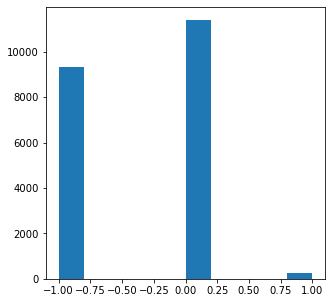

Variable Name:  night_pck_user_8


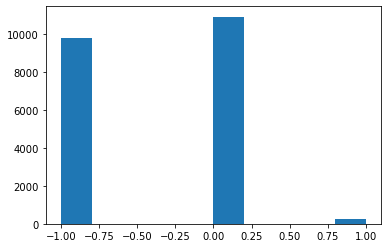

Variable Name:  night_pck_user_7


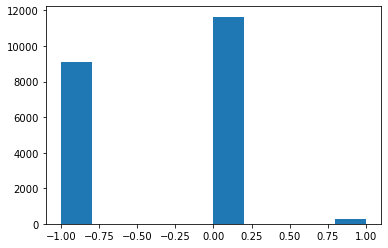

Variable Name:  monthly_2g_6


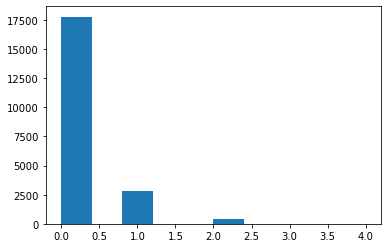

Variable Name:  monthly_2g_7


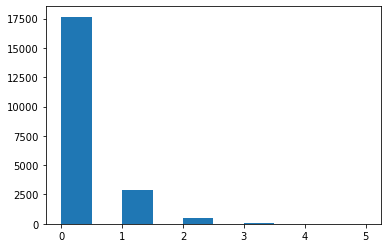

Variable Name:  monthly_2g_8


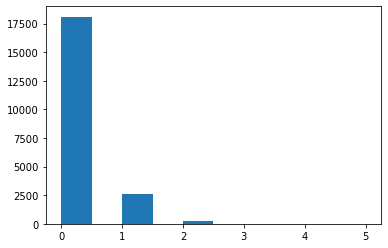

Variable Name:  sachet_2g_6


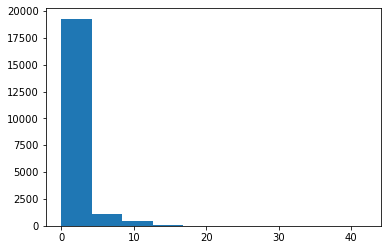

Variable Name:  sachet_2g_7


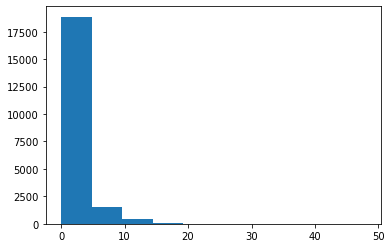

Variable Name:  sachet_2g_8


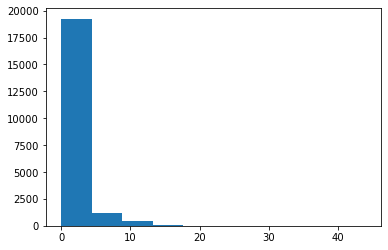

Variable Name:  monthly_3g_6


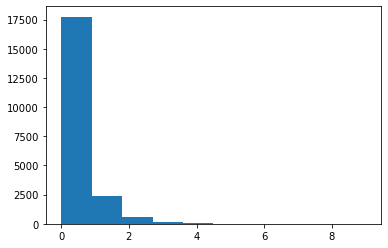

Variable Name:  monthly_3g_7


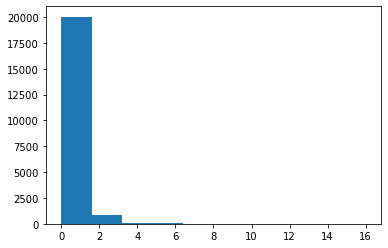

Variable Name:  monthly_3g_8


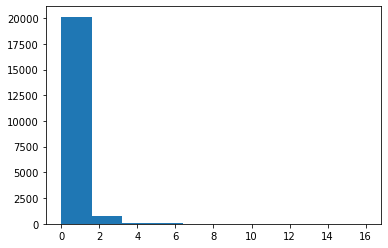

Variable Name:  sachet_3g_6


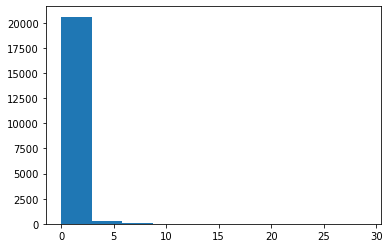

Variable Name:  sachet_3g_7


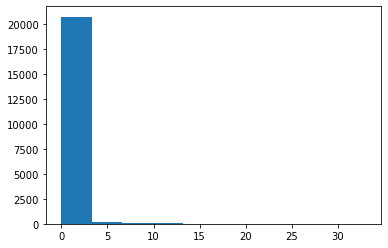

Variable Name:  sachet_3g_8


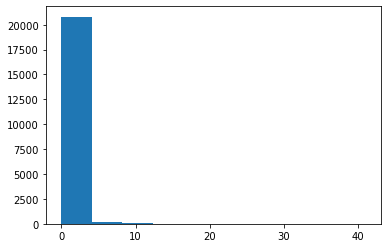

Variable Name:  fb_user_6


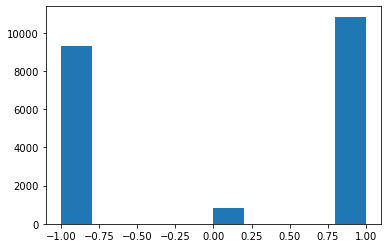

Variable Name:  fb_user_7


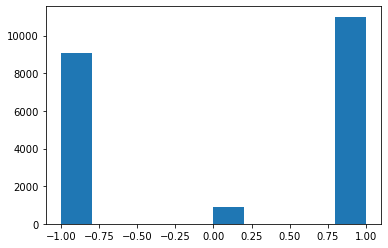

Variable Name:  fb_user_8


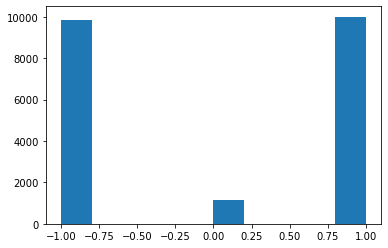

In [60]:
#Draw histogram to see the distribution of below variables
cont_ctg_var=['night_pck_user_6', 'night_pck_user_8', 'night_pck_user_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
plt.figure(figsize=(5,5))
for i in cont_ctg_var:
    print("Variable Name: ",i)
    plt.hist(data_v1_hvc[i])
    plt.show()

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

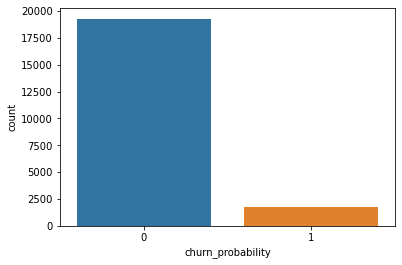

In [61]:
display(sb.countplot(x="churn_probability",data = data_v1_hvc))

##### Insight: Percent of churn is very low in compared to non churn

<h1><a id='Bivariate_Analysis'>Bivariate Analysis</a><br></h1>

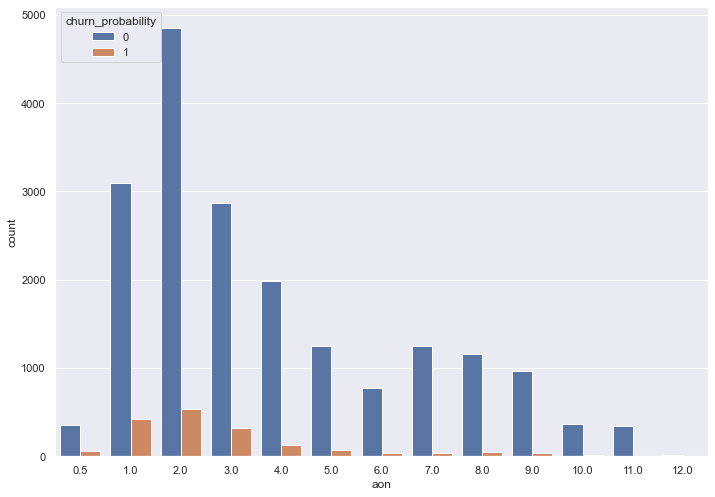

In [62]:
#plotting count plot between age on network and the churn probability
sb.set(rc={'figure.figsize':(11.7,8.27)})
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sb.countplot(pd.cut(round(((data_v1_hvc['aon']/30)/12),1), bins = bins, labels = labels),hue = data_v1_hvc['churn_probability'])
plt.show()

#### Insight:
##### With the increase in age on network, churn count is decreasing and hence probability of getting churn will decrease if customer stays long with the netwrok

In [63]:
#Writing generic function for displaying box plot based on attributes given as input vs churn probability
def colboxplt(cols):
    plt.figure(figsize=(40, 25))
    for i in range(len(cols)):
        plt.subplot(2,len(cols),i+1)
        K = pd.concat([data_v1_hvc[cols[i]],data_v1_hvc['churn_probability']], axis=1)
        K = pd.melt(K,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = K)
        plt.xticks()    
        plt.suptitle('Incoming Calls Usage')
        plt.subplot(2,3,3+i+1)
        sb.distplot(data[cols[i]])

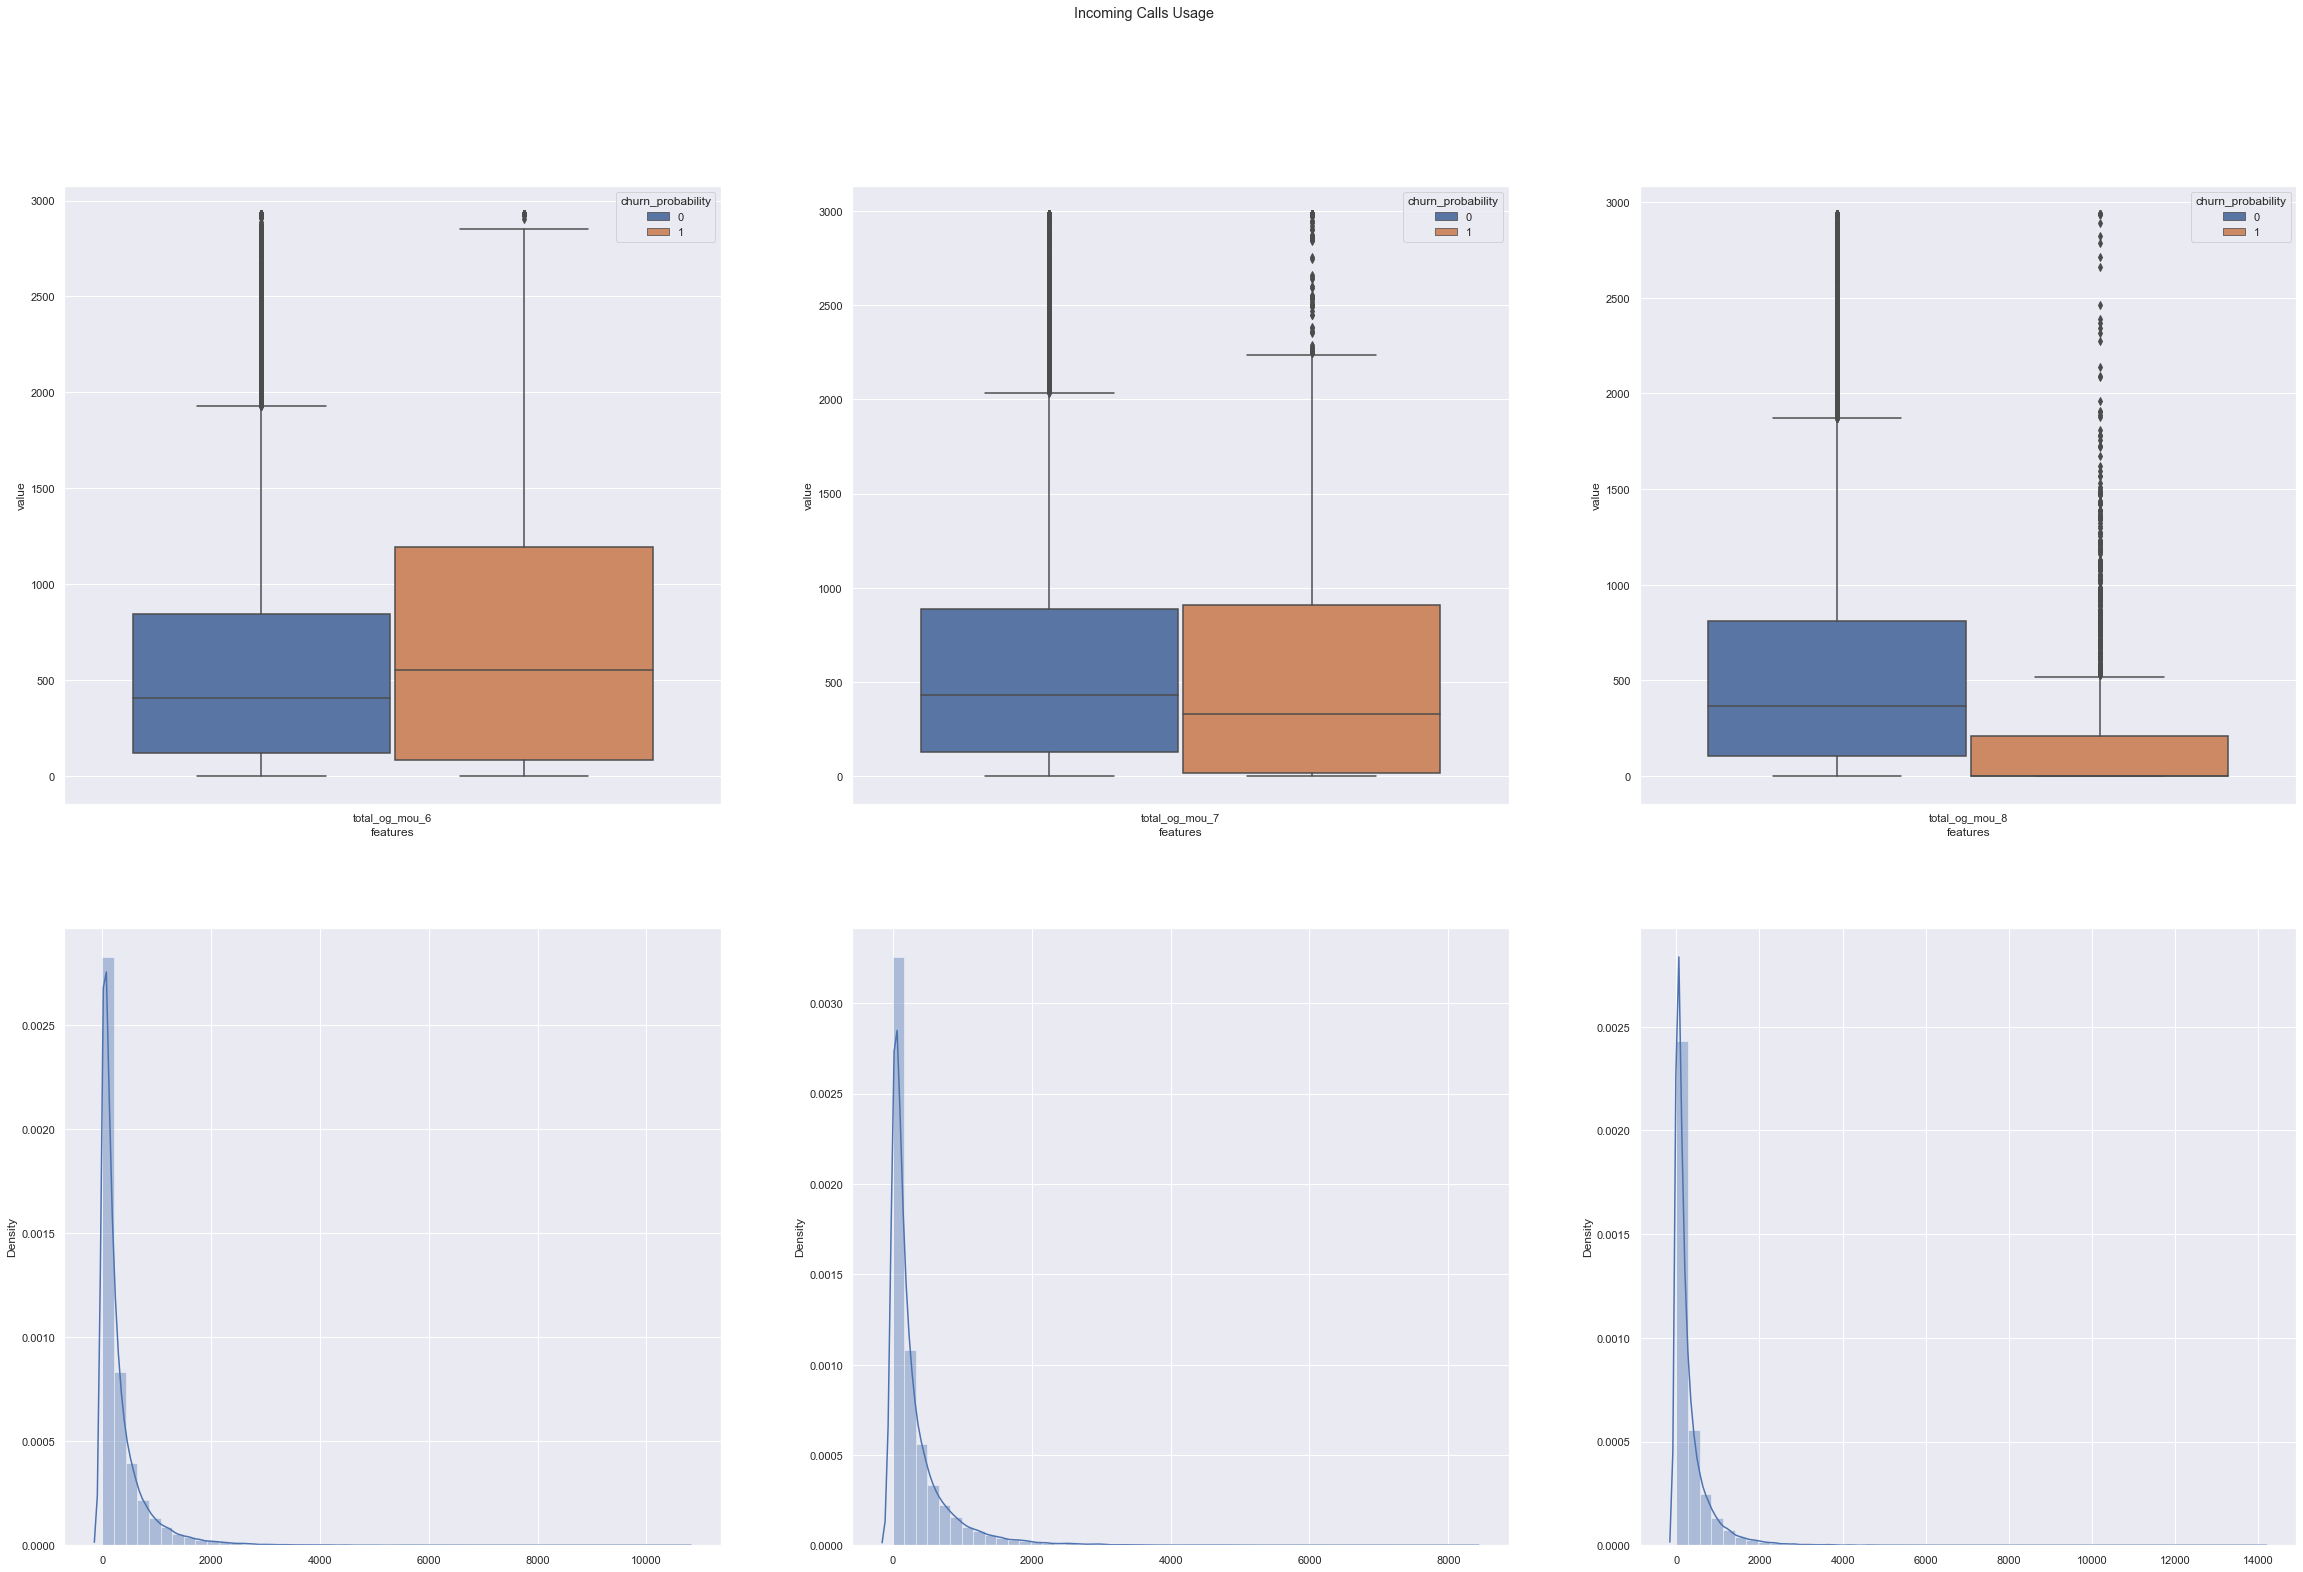

In [64]:
# Analysis Outgoing Minutes of Usage 
cols = [['total_og_mou_6'],
        ['total_og_mou_7'],
        ['total_og_mou_8']]
colboxplt(cols)

#### Insights:
#####  If the amount of outgoing is increasing can see for june and july month the amount of churn is relatively more

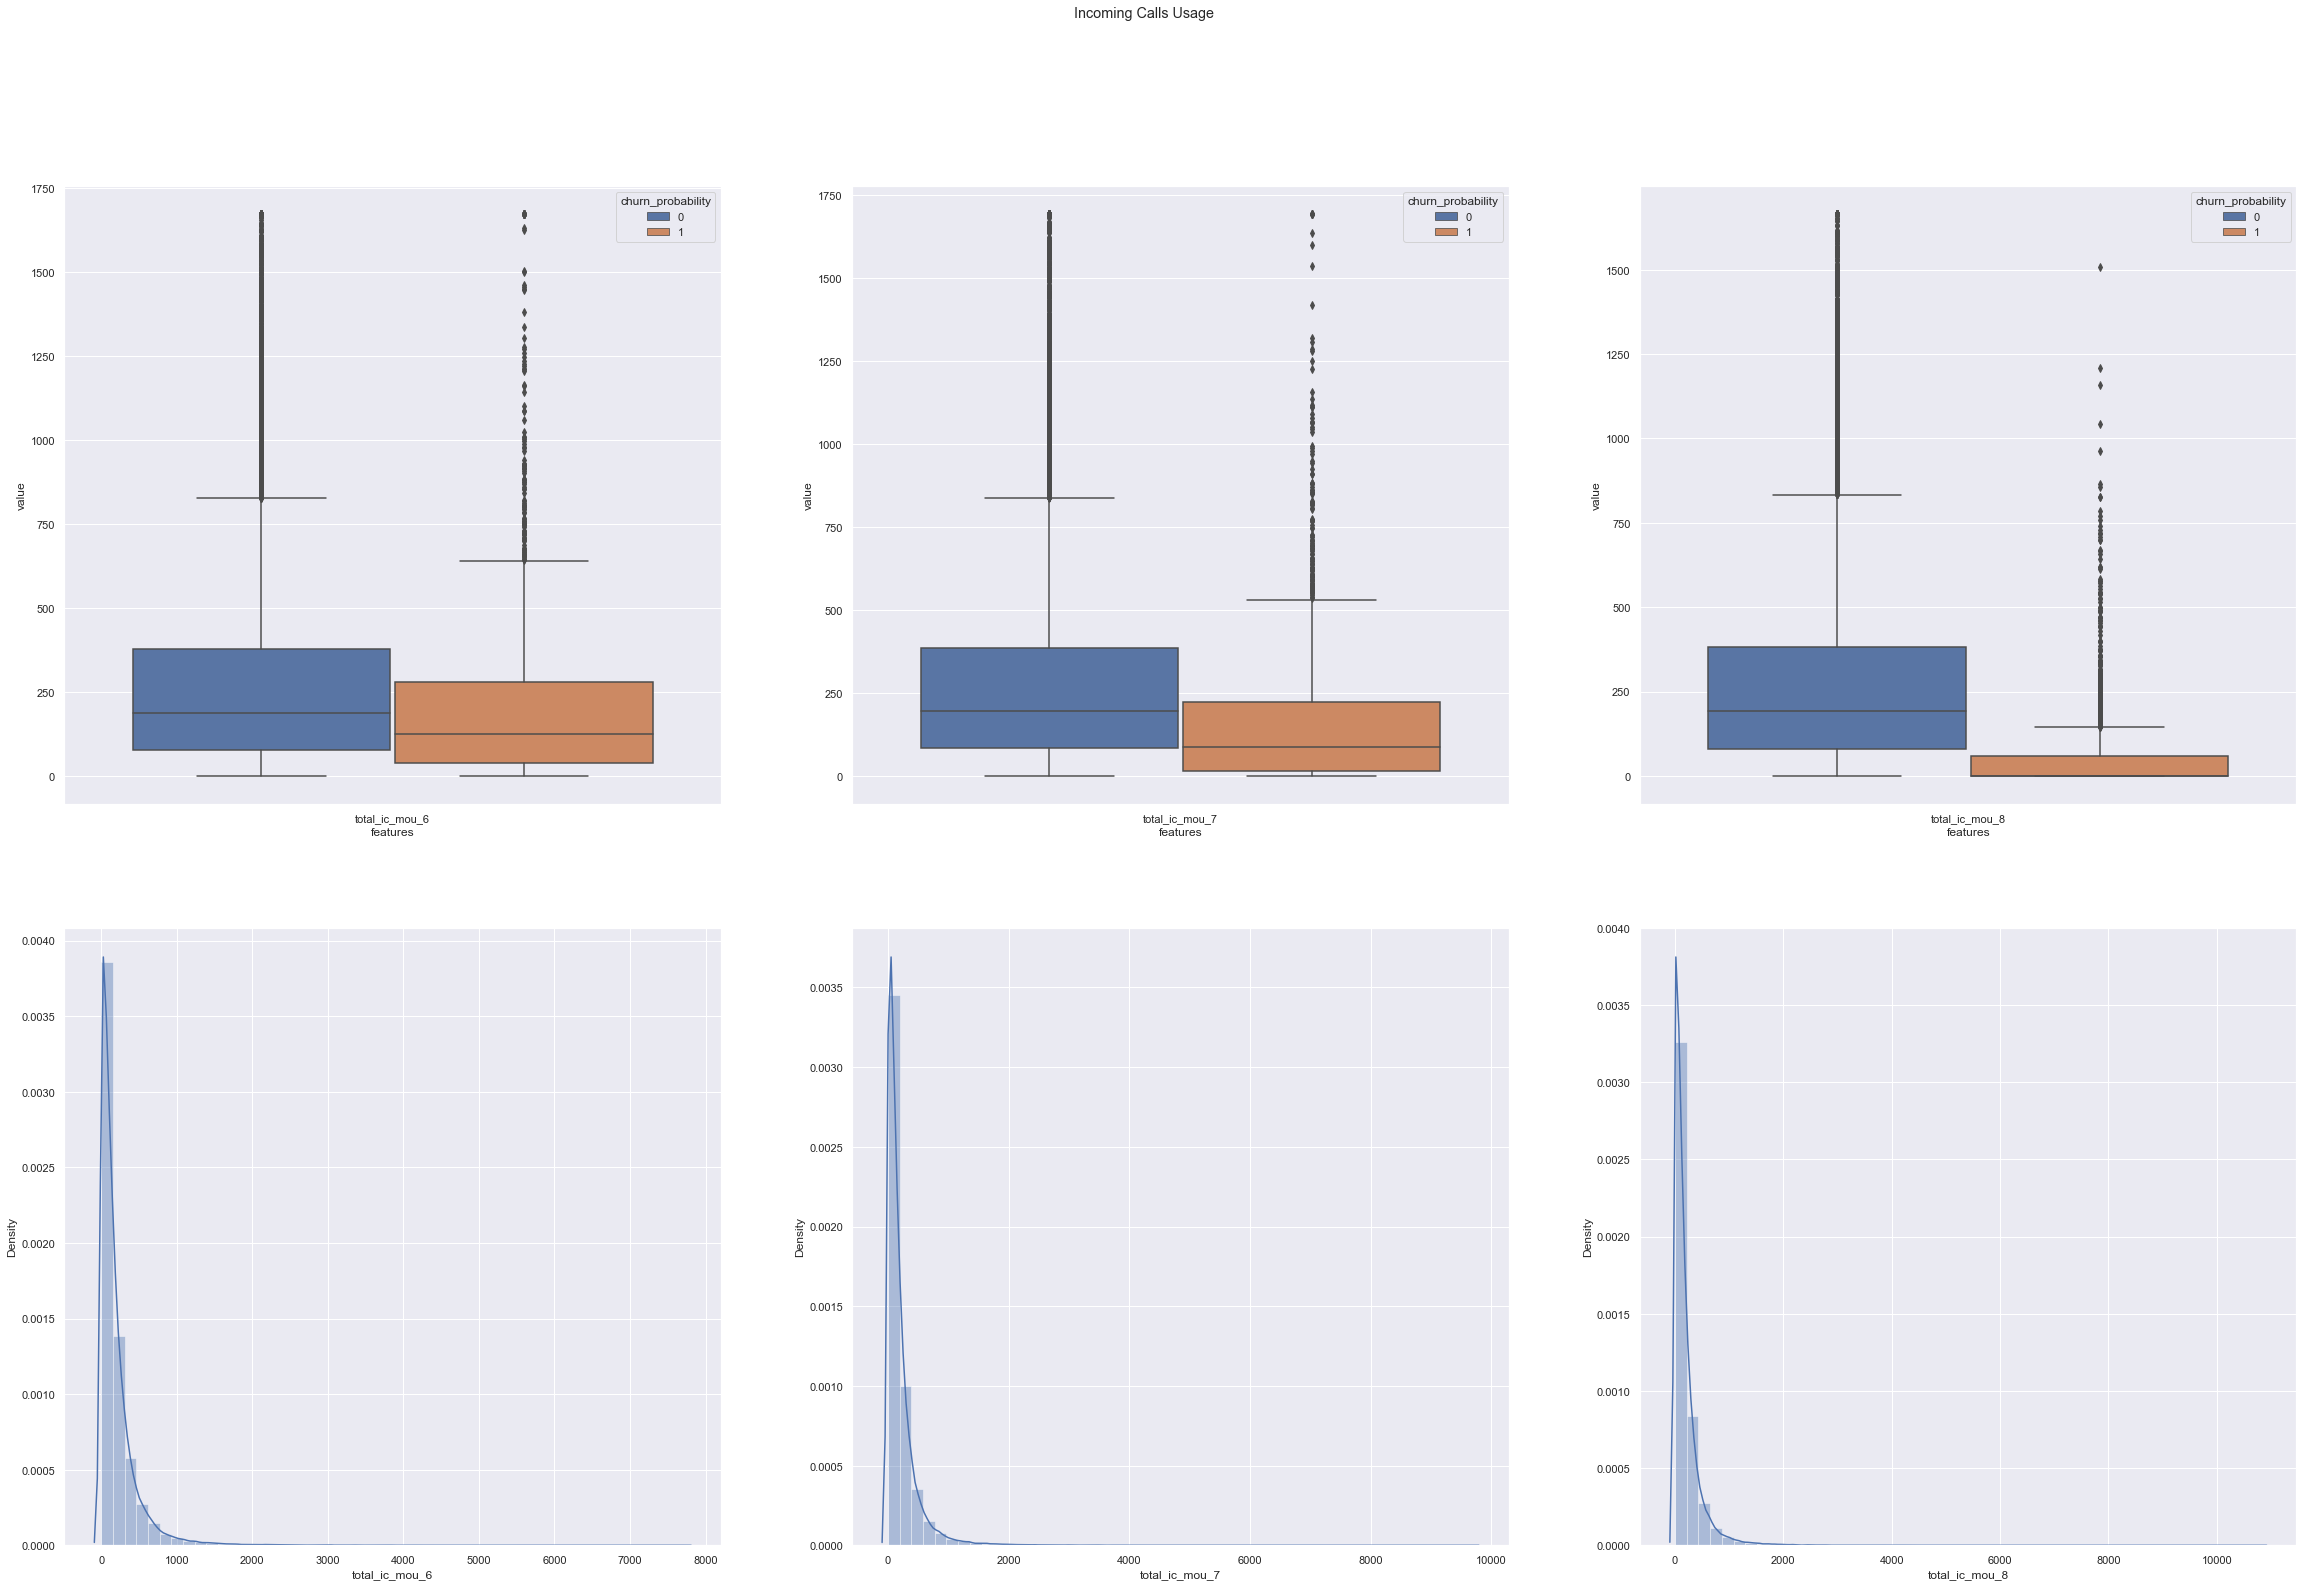

In [65]:
# Analysis Incoming Minutes of Usage 
cols =["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"]
colboxplt(cols)

#### Insights:
###### Total Minutes of usage for Incoming calls are skewed to left side 
###### If the total MOU is more, the probability of getting churned is less

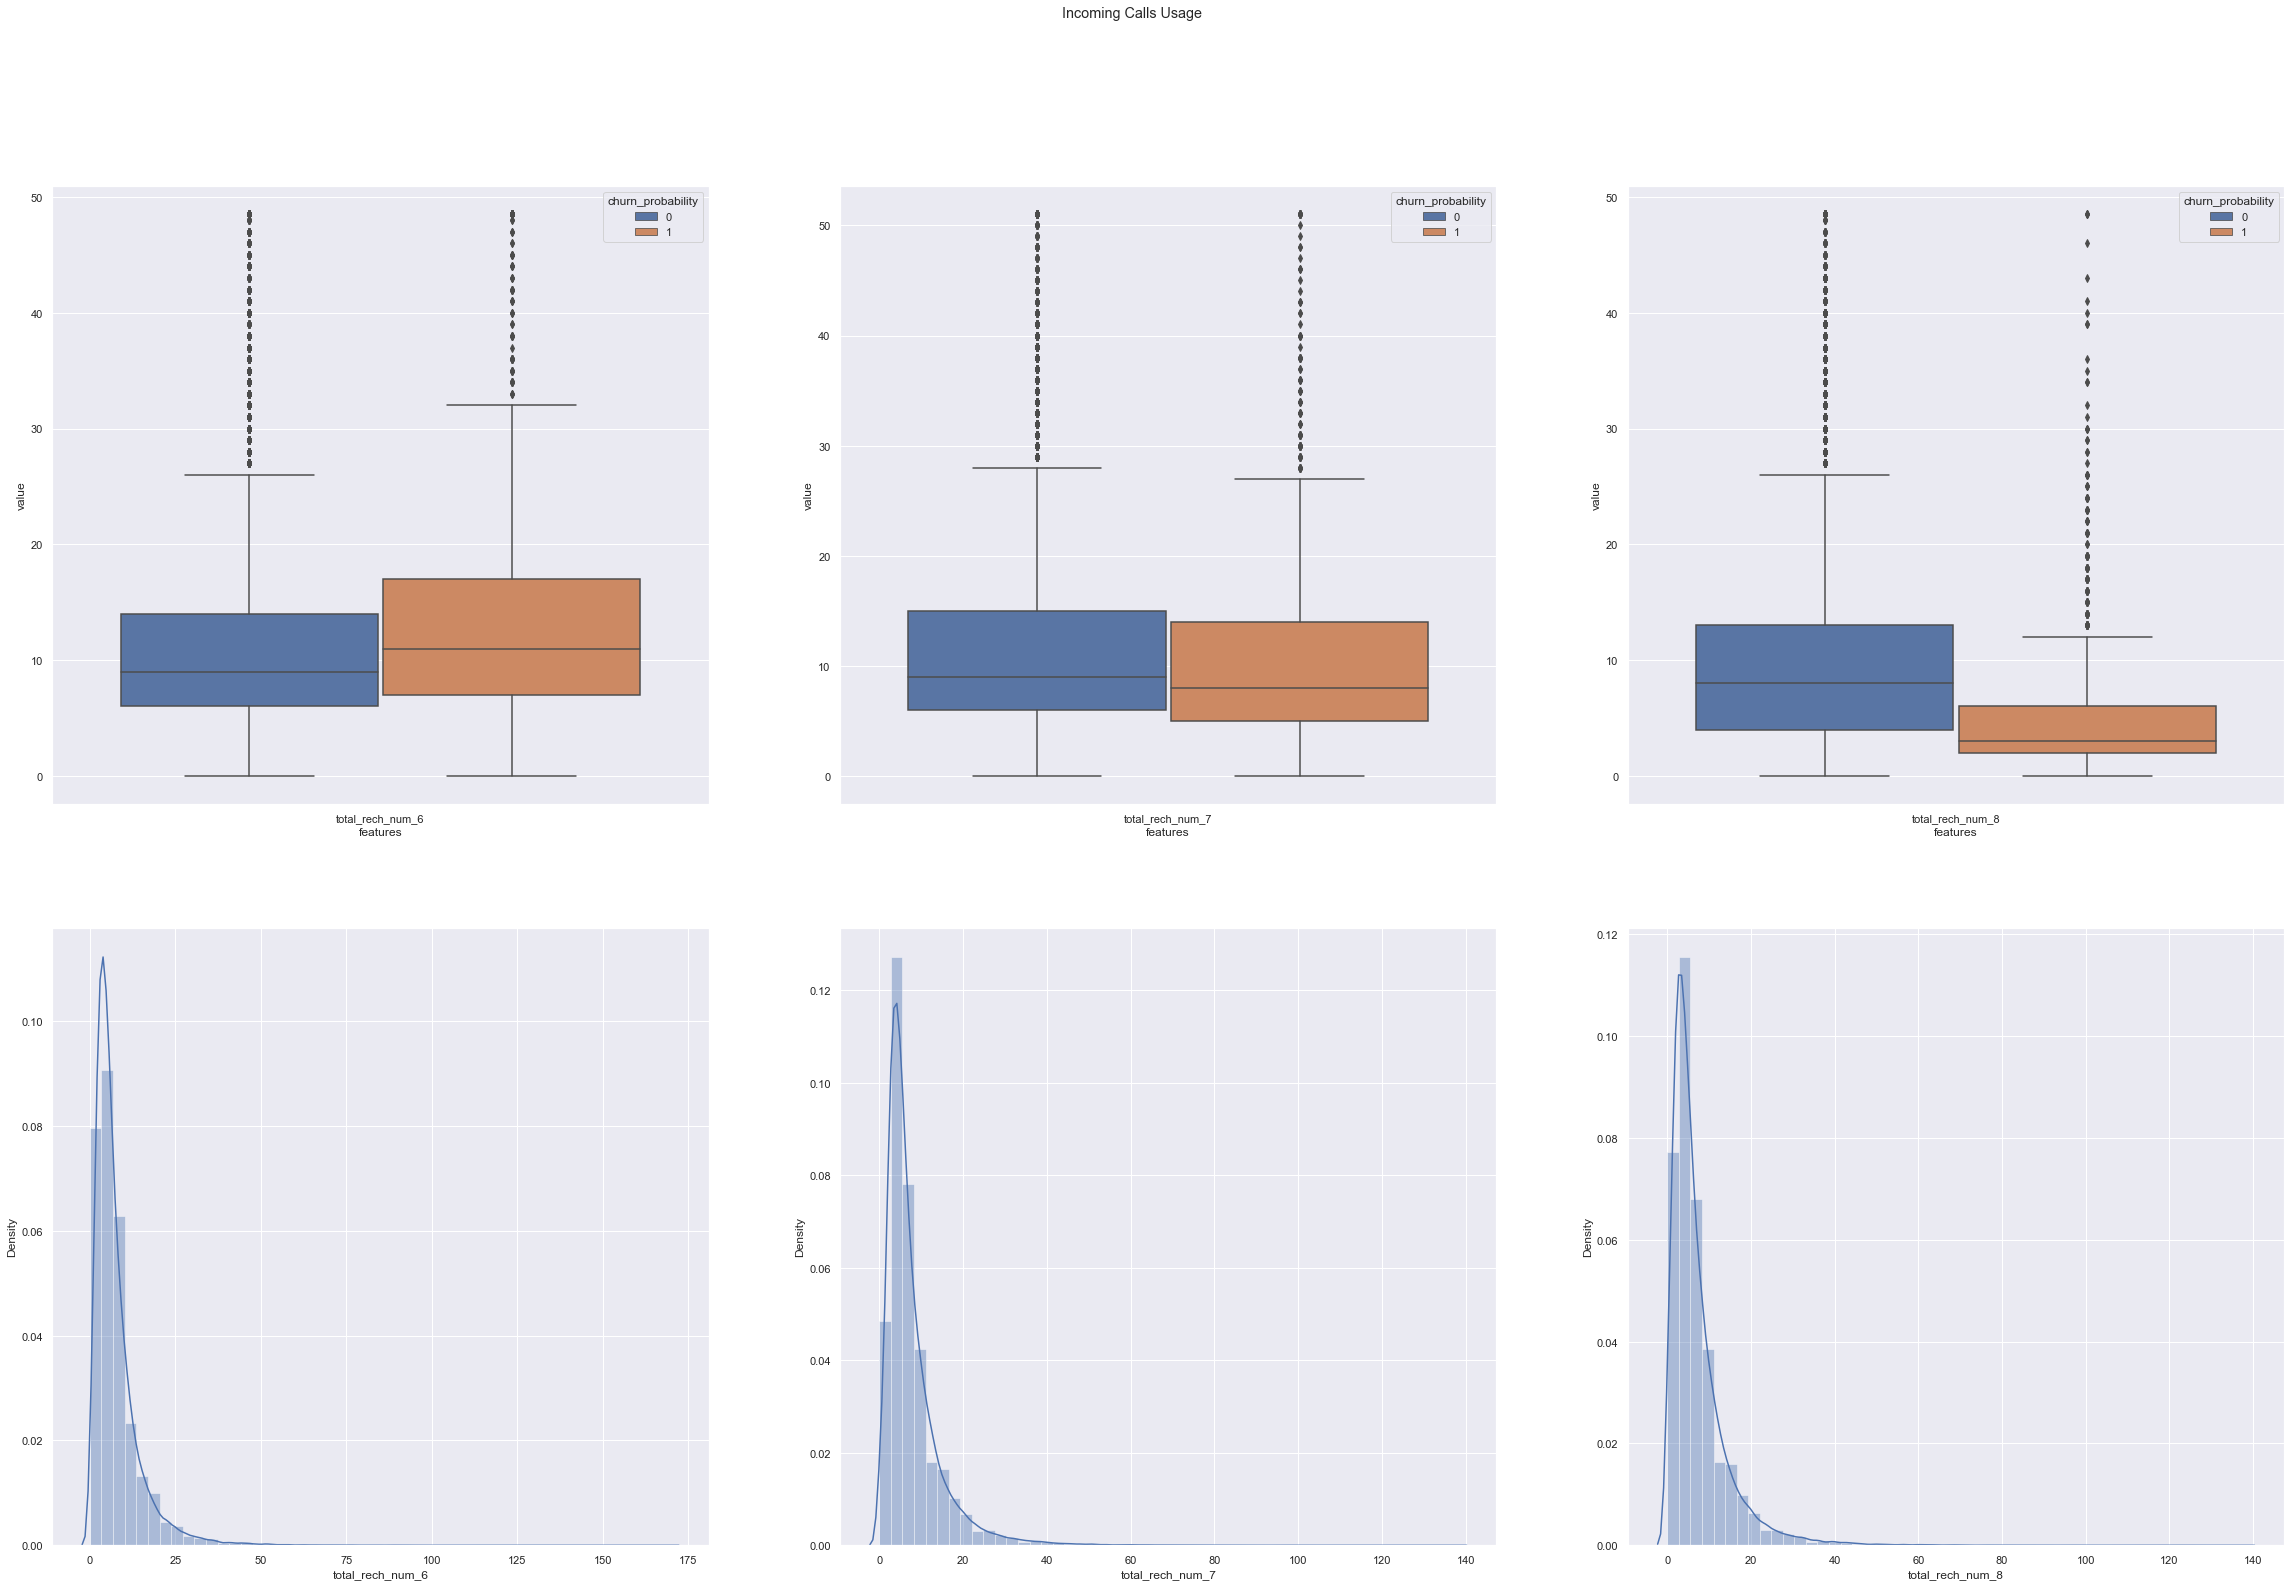

In [66]:
#Analysis total recharge
cols = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
colboxplt(cols)


#### Insights:

#####  For June month, increase in the total rechage, can observe for more churn 

In [67]:
#define custom function to draw boxplot for bivariate analysis
def Bivariate_boxplt(cols):
    plt.figure(figsize=(60, 45))
    for i in range(0,11):
        plt.subplot(4,3,i+1)
        BV = pd.concat([data_v1_hvc[cols[i]],data_v1_hvc['churn_probability']], axis=1)
        BV = pd.melt(BV,id_vars="churn_probability",var_name="features",value_name='value')
        sb.boxplot(x="features", y="value", hue="churn_probability",data = BV)
        plt.xticks()    
        plt.suptitle('2G-3G Volume')

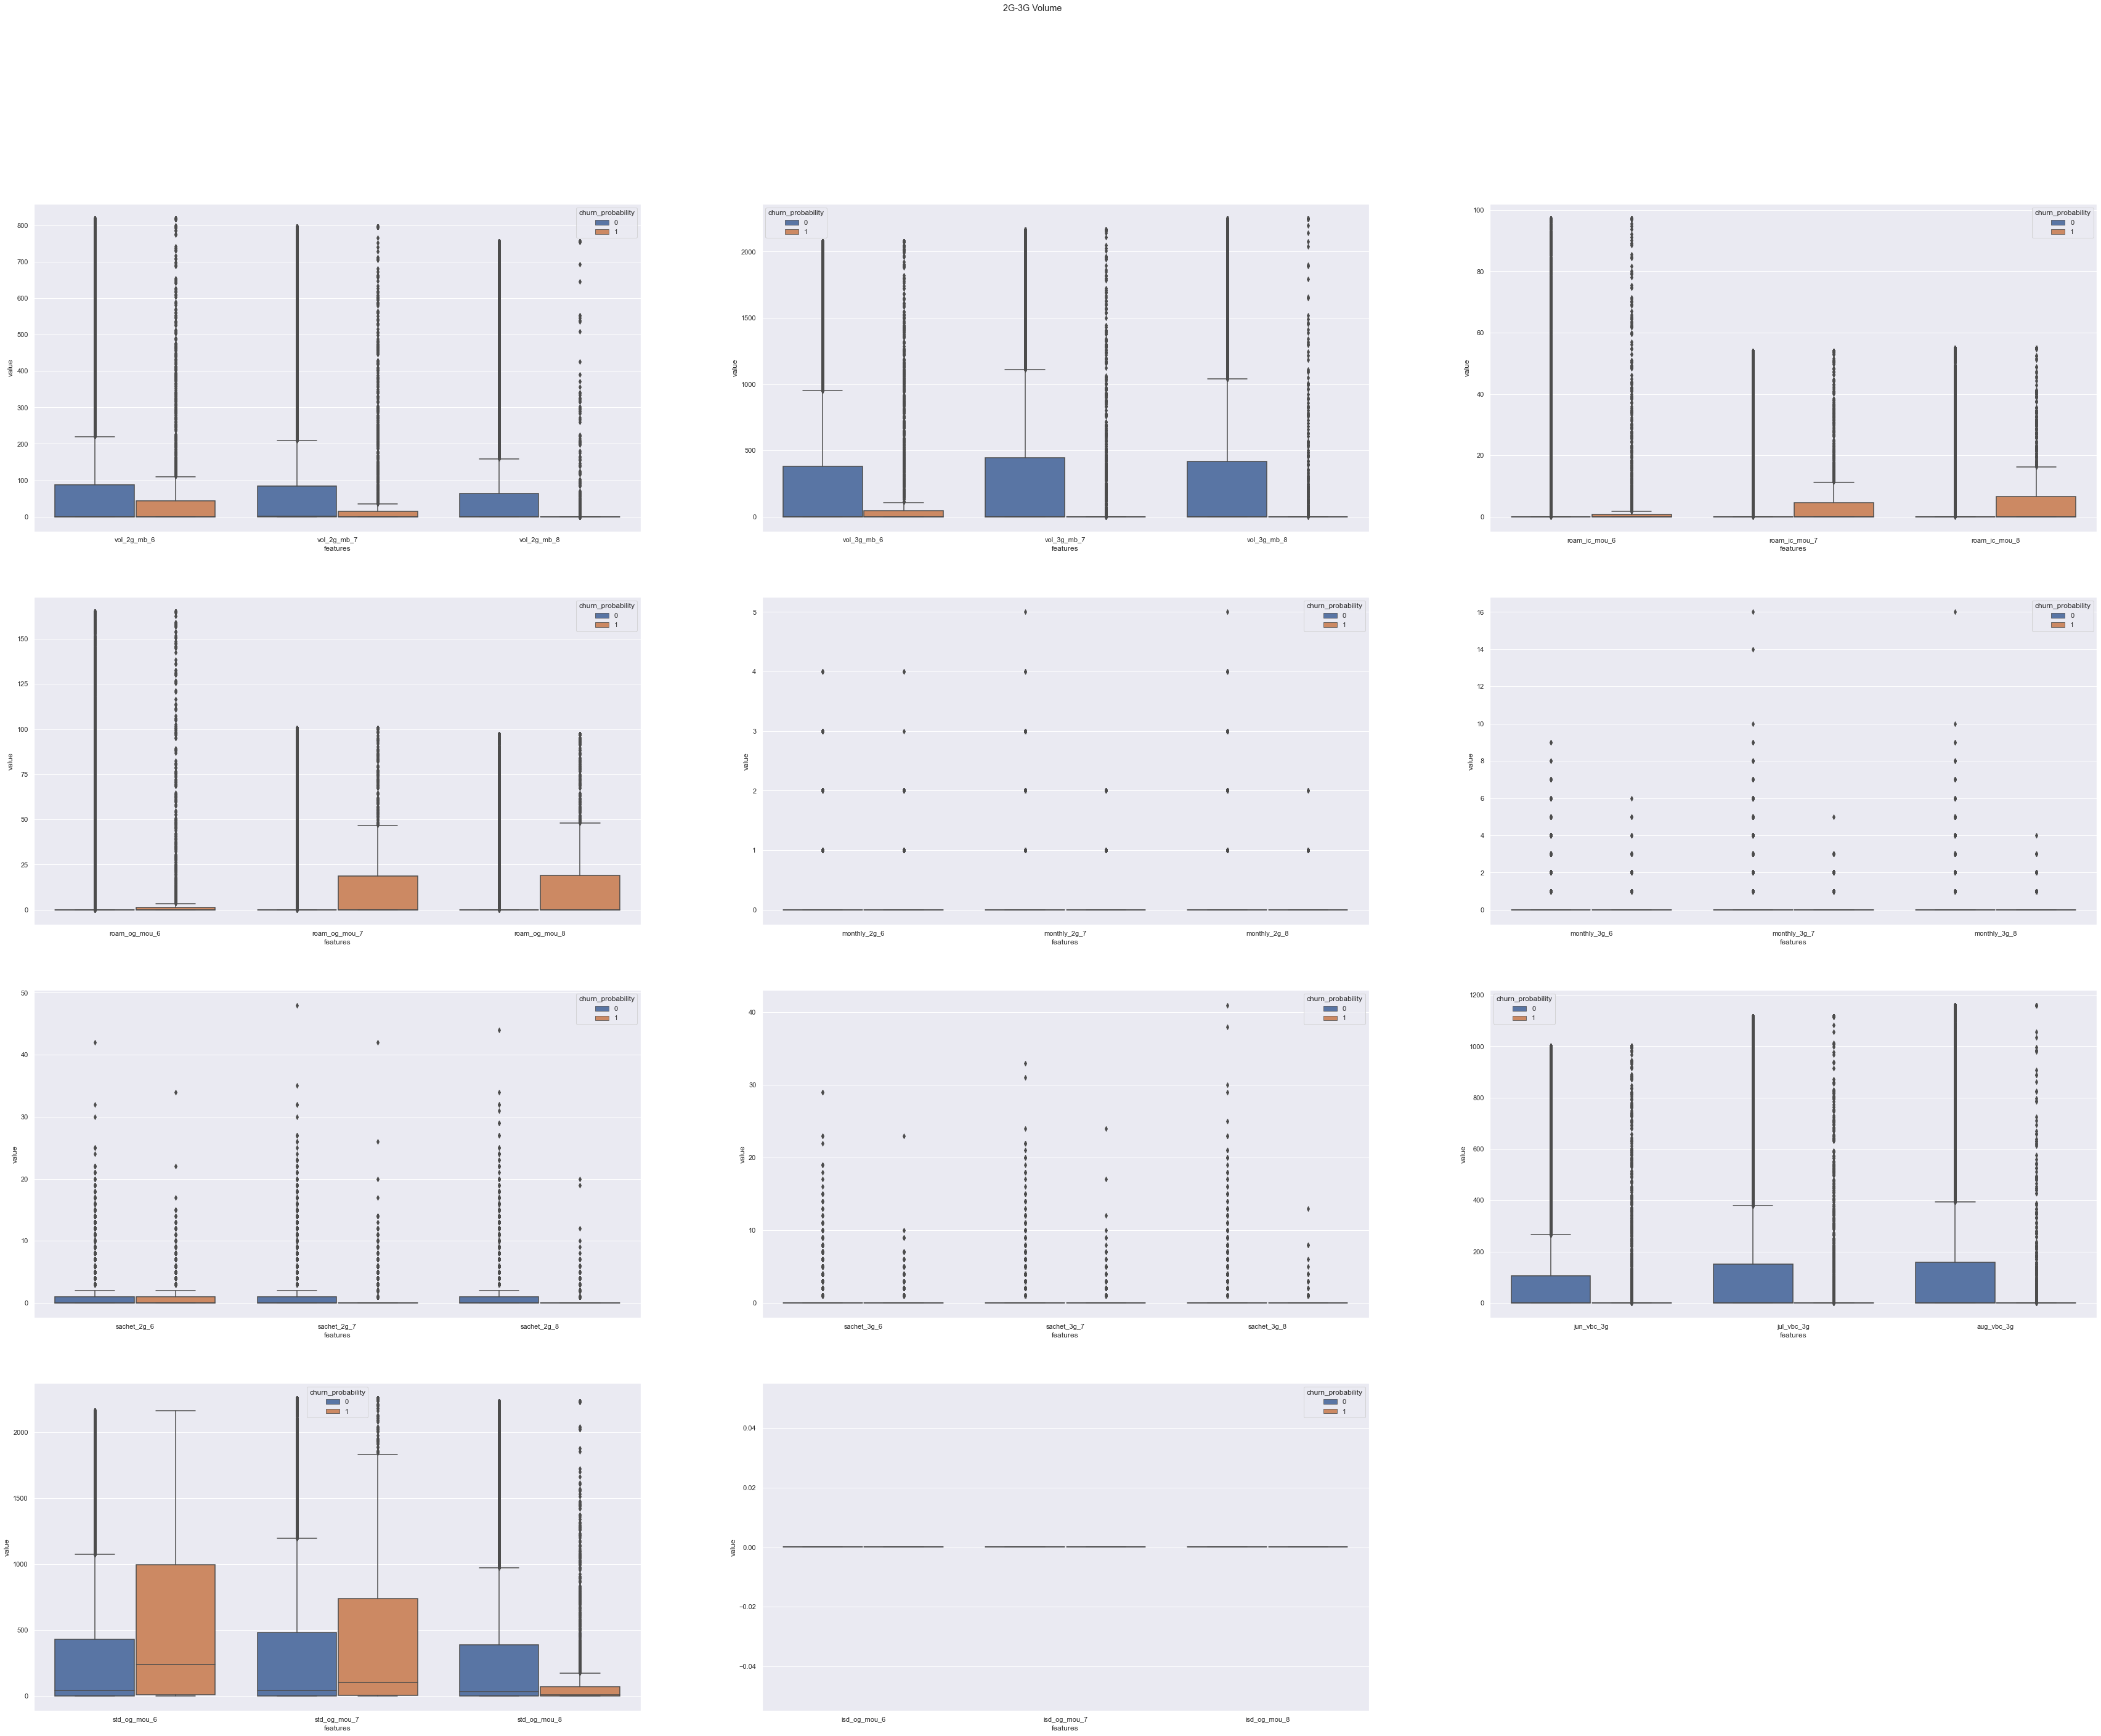

In [77]:
# Drawing box plot for below continuous variables and compare with chrun across different months
cols = [
        ['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],
        ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],
        ['std_og_mou_6','std_og_mou_7','std_og_mou_8'],
        ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']
       ]
Bivariate_boxplt(cols)

#### Insights:
##### Increase in roaming, churn is increasing
##### Increase in outgoing std, churn is high

<AxesSubplot:>

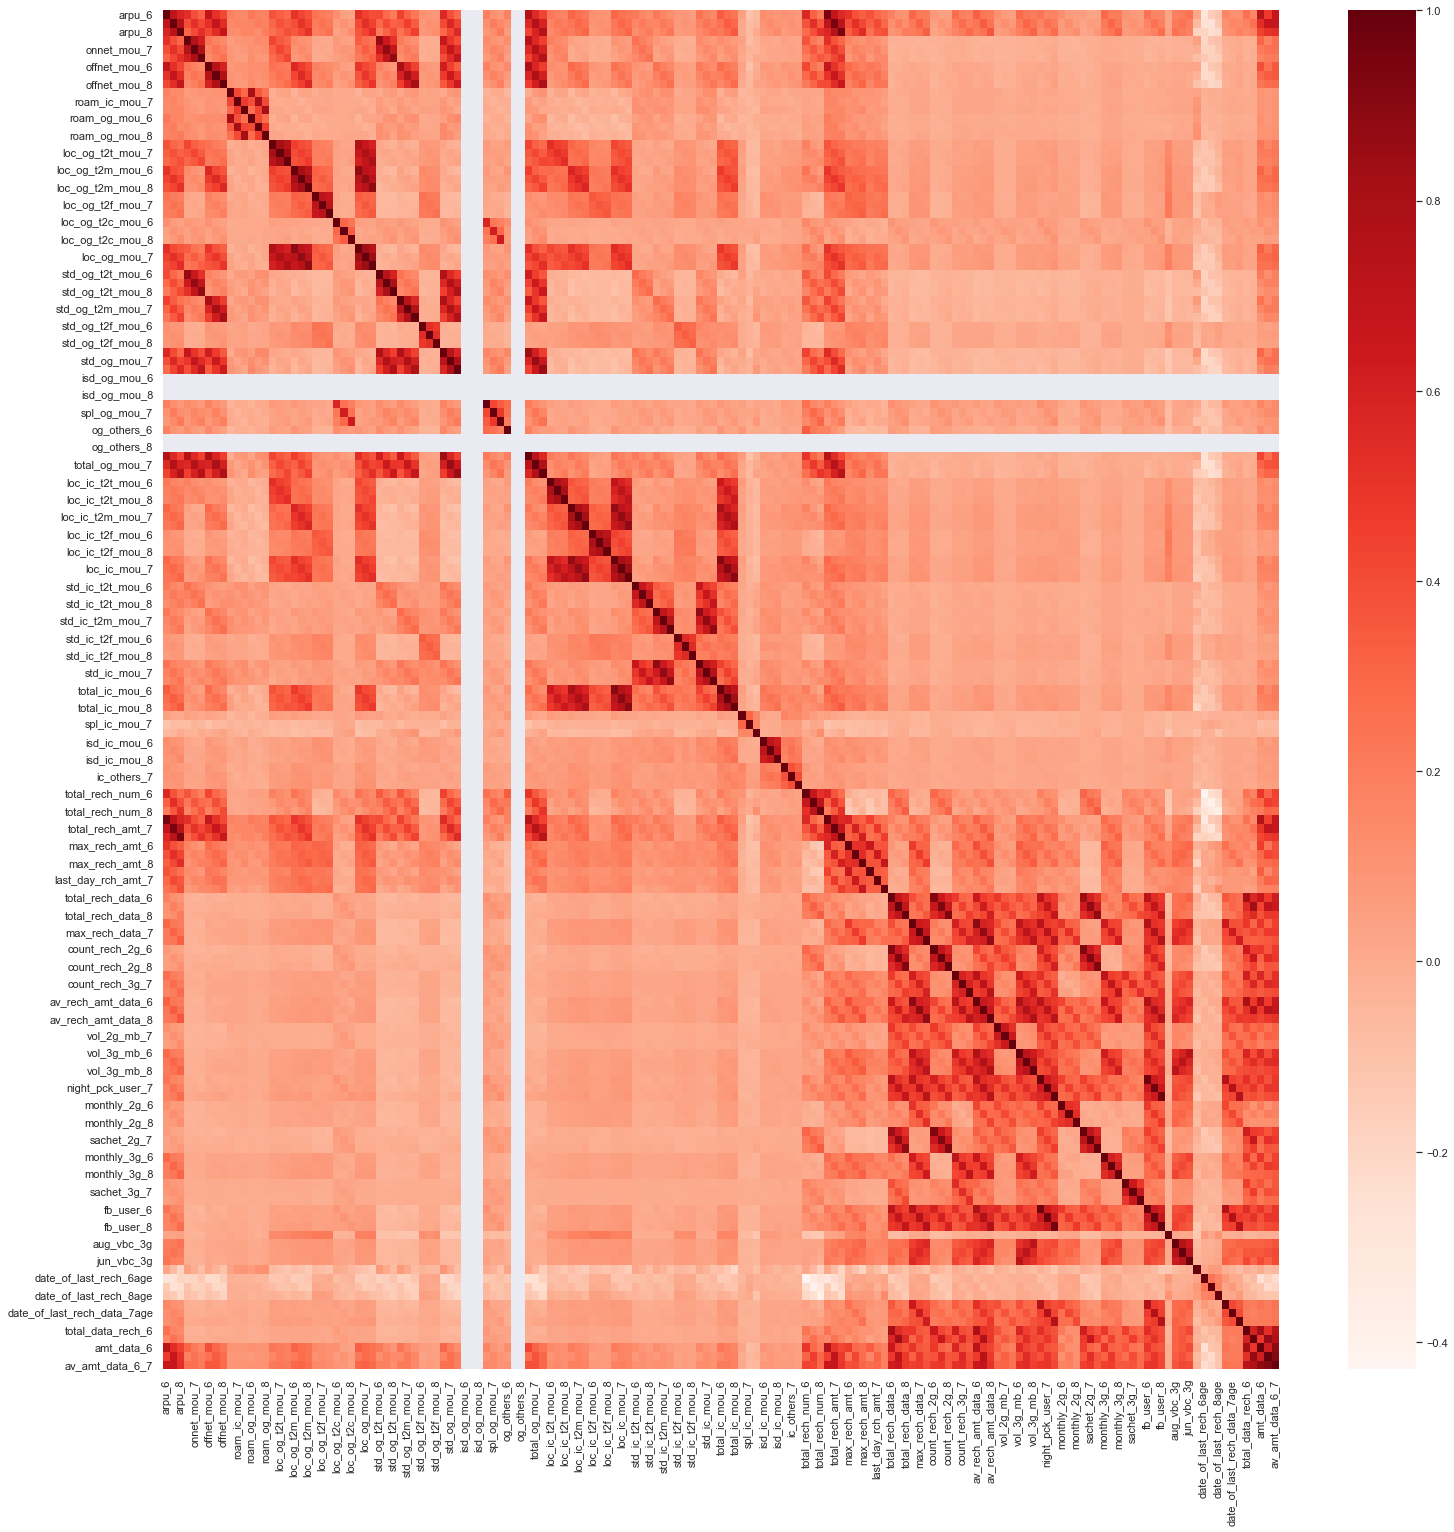

In [78]:
#Ploting Heat map for Correlation analyis

plt.figure(figsize=(25,25))
sb.heatmap(data_v1.corr(),cmap="Reds")

#### Insights:
###### Most of the features seems highly correlated. So, we need to use PCA to handle multicollinearity and dimensionality reductions

In [79]:
#Spliting testing and training data 

X = data_v1_hvc.drop(["churn_probability"],1)
Y = data_v1_hvc.churn_probability

In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

In [81]:
# Aggregating the Categorical Columns

train = pd.concat([xtrain, ytrain], axis=1)

# aggregate the categorical variables
display(train.groupby('night_pck_user_6').churn_probability.mean())
display(train.groupby('night_pck_user_7').churn_probability.mean())
display(train.groupby('night_pck_user_8').churn_probability.mean())
display(train.groupby('fb_user_6').churn_probability.mean())
display(train.groupby('fb_user_7').churn_probability.mean())
display(train.groupby('fb_user_8').churn_probability.mean())

# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.107529, 0: 0.084044, 1: 0.127596},
           'night_pck_user_7' : {-1: 0.114231, 0: 0.065649, 1: 0.068750},
           'night_pck_user_8' : {-1: 0.126636, 0: 0.032644, 1: 0.034602},
           'fb_user_6'        : {-1: 0.107529, 0: 0.105496, 1: 0.083258},
           'fb_user_7'        : {-1: 0.114231, 0: 0.087029, 1: 0.063630},
           'fb_user_8'        : {-1: 0.126636, 0: 0.062458, 1: 0.029049}
          }
xtrain.replace(mapping, inplace = True)
xtest.replace(mapping, inplace = True)

night_pck_user_6
-1.0    0.098598
 0.0    0.068796
 1.0    0.113990
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.114313
 0.0    0.058338
 1.0    0.061538
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.142836
 0.0    0.030319
 1.0    0.023952
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.098598
 0.0    0.087838
 1.0    0.068459
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.114313
 0.0    0.068217
 1.0    0.057590
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.142836
 0.0    0.070238
 1.0    0.025385
Name: churn_probability, dtype: float64

In [82]:
data_v1_hvc.shape

(21009, 175)

<h1><a id='Model_Preparation'>Principal Component Analysis</a><br></h1>

<h3><a id='Case1'>Case 1</a></h3><br>
<h4><a id='Data_Split'>By Splitting train data into train and test</a><br></h4>

In [83]:
#find value count % of churn probability
round(100*data_v1_hvc['churn_probability'].value_counts()/len(data_v1_hvc.index),2)

0    91.73
1     8.27
Name: churn_probability, dtype: float64

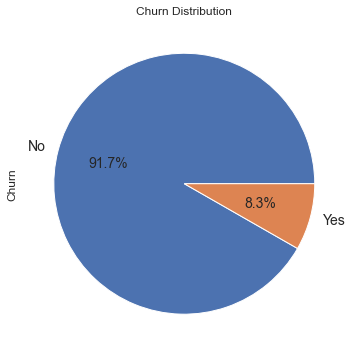

In [84]:
#Churn Distribution
pie_chart = data_v1_hvc['churn_probability'].value_counts()*100.0 /len(data_v1_hvc)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

<h4><a id='Feature_Scaling'>Data Scaling</a><br></h4>

In [85]:
# Scaling the data using Standard Scaler
col = list(xtrain.columns)
# Data Scaling
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)
test_v1_scaled = scaler.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(xtrain)
xtrain_pca = pca.fit_transform(xtrain_scaled)

### PCA

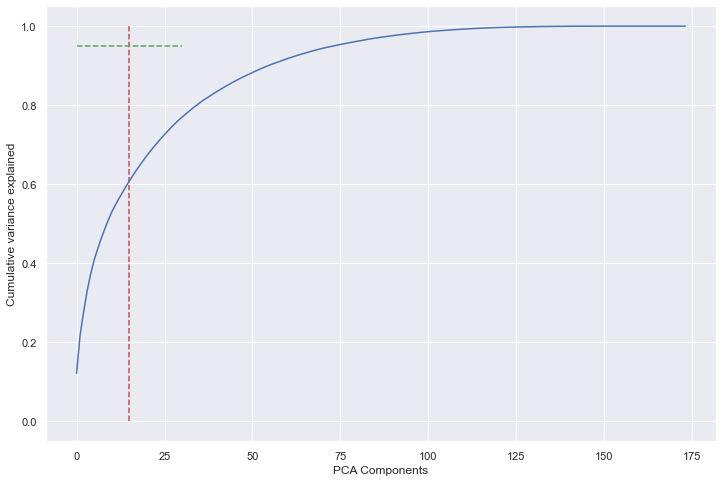

In [86]:
#  feature variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("PCA Components")
plt.ylabel("Cumulative variance explained")
plt.show()

In [87]:
df_pca_c1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca_c1.head(10)

,PC1,PC2,PC3,Feature
0,0.112303,0.065370,0.061337,arpu_6
1,0.117440,0.077487,0.133886,arpu_7
2,0.101265,0.107994,0.183459,arpu_8
3,0.113755,-0.037070,0.056799,onnet_mou_6
4,0.118836,-0.033277,0.096784,onnet_mou_7
5,0.112618,-0.010274,0.132415,onnet_mou_8
6,0.135125,0.015077,0.022687,offnet_mou_6
7,0.141081,0.018838,0.073701,offnet_mou_7
8,0.130695,0.046310,0.116258,offnet_mou_8
9,0.025091,0.009033,0.055146,roam_ic_mou_6


In [88]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.18, 21.77, 27.67, 32.98, 37.27, 40.86, 43.64, 46.28, 48.66,
       50.9 , 52.97, 54.68, 56.31, 57.85, 59.38, 60.82, 62.19, 63.54,
       64.82, 66.06, 67.28, 68.41, 69.5 , 70.54, 71.58, 72.58, 73.54,
       74.47, 75.35, 76.21, 76.99, 77.76, 78.49, 79.21, 79.9 , 80.58,
       81.21, 81.8 , 82.38, 82.96, 83.51, 84.04, 84.57, 85.08, 85.58,
       86.06, 86.52, 86.98, 87.41, 87.84, 88.25, 88.66, 89.06, 89.44,
       89.81, 90.16, 90.5 , 90.83, 91.16, 91.48, 91.78, 92.08, 92.38,
       92.66, 92.93, 93.19, 93.45, 93.7 , 93.94, 94.17, 94.39, 94.59,
       94.78, 94.97, 95.16, 95.34, 95.52, 95.7 , 95.87, 96.04, 96.21,
       96.37, 96.52, 96.67, 96.82, 96.96, 97.1 , 97.23, 97.35, 97.47,
       97.59, 97.71, 97.82, 97.93, 98.03, 98.13, 98.23, 98.32, 98.41,
       98.5 , 98.58, 98.66, 98.74, 98.81, 98.88, 98.94, 99.  , 99.06,
       99.12, 99.18, 99.23, 99.28, 99.33, 99.38, 99.43, 99.47, 99.51,
       99.55, 99.58, 99.61, 99.64, 99.67, 99.7 , 99.72, 99.74, 99.76,
       99.78, 99.8 ,

#### 75 variables will be enough to explain 95% variance in the dataset and hence selecting 75 variables for our modelling

<h4><a id="Handle_Imbalance_Dataset_Using_SMOTE">Handling Class Imbalance using SMOTE</a></h4>

In [89]:
display("Applying SMOTE to normalize imbalance ")
smote = imblearn.over_sampling.SMOTE(.8)
x_smote,y_smote = smote.fit_sample(xtrain_scaled,ytrain)
display("Shape of train datatset after SMOTE : "+ str(x_smote.shape))

# Applying Incremental PCA
pca = IncrementalPCA(n_components=75)    
x_train_smote_pca = pca.fit_transform(x_smote)
x_test_smote_pca = pca.transform(xtest_scaled)
test_v1_scaled_pca = pca.transform(test_v1_scaled)


'Applying SMOTE to normalize imbalance '

'Shape of train datatset after SMOTE : (24282, 174)'

In [90]:
display("Shape of train datatset after SMOTE and PCA : "+str(x_train_smote_pca.shape))

'Shape of train datatset after SMOTE and PCA : (24282, 75)'

In [91]:
x_test_smote_pca.shape

(6303, 75)

In [92]:
from collections import Counter

display(Counter(ytrain))
display(Counter(y_smote))

Counter({0: 13490, 1: 1216})

Counter({0: 13490, 1: 10792})

### Function to Get Metrics for Model Evaluation

In [93]:
def evaluate_model_metric(dt_classifier,ytrain,ytest,xtrain,xtest):
    print("Train Accuracy :", accuracy_score(ytrain, dt_classifier.predict(xtrain)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(ytrain, dt_classifier.predict(xtrain)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(ytest, dt_classifier.predict(xtest)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(ytest, dt_classifier.predict(xtest)))
    sensitivity, specificity, _ = sensitivity_specificity_support(ytest, dt_classifier.predict(xtest), average='binary')
    print("Sensitivity:", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))
    print("Recall Score:",round(metrics.recall_score(ytest,dt_classifier.predict(xtest)),2))
    print("Precision Score:",round(metrics.precision_score(ytest,dt_classifier.predict(xtest)),2))
    print("ROC AUC:",round(metrics.roc_auc_score(ytest,dt_classifier.predict(xtest)),2))
    print("F1 Score:",round(metrics.f1_score(ytest,dt_classifier.predict(xtest)),2))
    

<h4><a id="Model_Creation">Model Creation</a></h4>

<h5><a id="Model_1_Logistic_Regression_Without_Hyperparameter_Tuning">Model 1 : Logistic Regression Without Hyperparameter Tuning</a></h5>

In [94]:
# Logistic Regression without Hyper Parameter Turning

#Training the model on the train data

lr = LogisticRegression()
model = lr.fit(x_train_smote_pca,y_smote)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test_smote_pca)[:,1]
display("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(ytest, pred_probs_test)))
evaluate_model_metric(lr,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

'Logistic Regression Accurancy : 0.88'

Train Accuracy : 0.863437937566922
Train Confusion Matrix:
[[11672  1818]
 [ 1498  9294]]
--------------------------------------------------
Test Accuracy : 0.8546723782325877
Test Confusion Matrix:
[[5001  781]
 [ 135  386]]
Sensitivity: 0.74
Specificity: 0.86
Recall Score: 0.74
Precision Score: 0.33
ROC AUC: 0.8
F1 Score: 0.46


<h5><a id="Model_2_Logistic_Regression_With_Hyperparameter_Tuning">Model 2 : Logistic Regression With Hyperparameter Tuning</a></h5>

In [95]:
# Logistic Regression with Hyper Parameter Turning

logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
lr_hp = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
lr_hp.fit(x_train_smote_pca, y_smote)

# display best hyperparameters
display("Best AUC: ", lr_hp.best_score_)
display("Best hyperparameters: ", lr_hp.best_params_)

evaluate_model_metric(lr_hp,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


'Best AUC: '

0.9231456976513366

'Best hyperparameters: '

{'C': 10, 'penalty': 'l2'}

Train Accuracy : 0.8633967547977927
Train Confusion Matrix:
[[11671  1819]
 [ 1498  9294]]
--------------------------------------------------
Test Accuracy : 0.8543550690147549
Test Confusion Matrix:
[[4999  783]
 [ 135  386]]
Sensitivity: 0.74
Specificity: 0.86
Recall Score: 0.74
Precision Score: 0.33
ROC AUC: 0.8
F1 Score: 0.46


####  Insights:
##### Logistic Regression before tuning its giving 88% accurancy and after tuning it is giving 92.5% 


<h5><a id="Model_3_Random_Forest_Without_Hyperparameter_Tuning">Model 3 : Random Forest without Hyperparameter Tuning</a></h5>

In [96]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train_smote_pca,y_smote)
evaluate_model_metric(rf,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9136918927494844
Test Confusion Matrix:
[[5548  234]
 [ 310  211]]
Sensitivity: 0.4
Specificity: 0.96
Recall Score: 0.4
Precision Score: 0.47
ROC AUC: 0.68
F1 Score: 0.44


In [97]:
# Random Forest Classifier Tuning 1

# number of variables to consider to split each node
max_features = int(round(np.sqrt(xtrain.shape[1])))  
display(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

rf_model.fit(x_train_smote_pca, y_smote)

display("OOB Score",rf_model.oob_score_)

evaluate_model_metric(rf_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

13

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


'OOB Score'

0.9563050819537106

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Accuracy : 1.0
Train Confusion Matrix:


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9043312708234175
Test Confusion Matrix:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[5515  267]
 [ 336  185]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Sensitivity: 0.36
Specificity: 0.95
Recall Score: 0.36


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Precision Score: 0.41


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC AUC: 0.65
F1 Score: 0.38


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


<h5><a id="Model_4_Random_Forest_With_Hyperparameter_Tuning">Model 4 : Random Forest with Hyperparameter Tuning</a></h5>

In [98]:
# Random Forest Classifier Tuning 2: Max Depth

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': range(2, 40, 5)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)


Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1, param_grid={'max_depth': range(2, 40, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [99]:
evaluate_model_metric(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

Train Accuracy : 0.9984350547730829
Train Confusion Matrix:
[[13452    38]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9140092019673172
Test Confusion Matrix:
[[5537  245]
 [ 297  224]]
Sensitivity: 0.43
Specificity: 0.96
Recall Score: 0.43
Precision Score: 0.48
ROC AUC: 0.69
F1 Score: 0.45


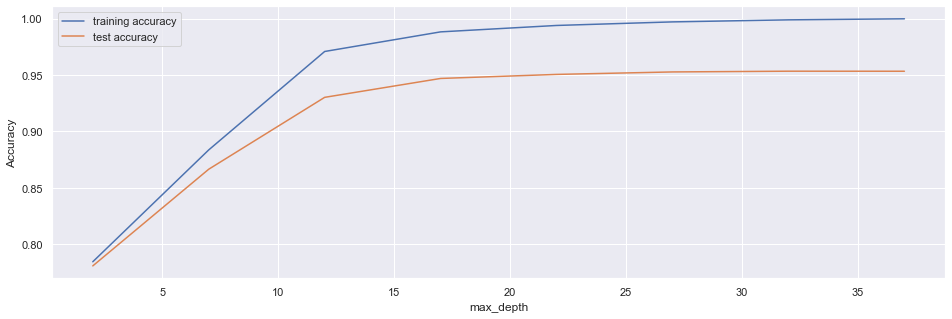

In [100]:
#Plot the graph for train and test accuracy
for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insight:
##### From the above plot max depth can be either 12 or 17. 
##### After 17 graph become constant

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9138505473584008
Test Confusion Matrix:
[[5546  236]
 [ 307  214]]
Sensitivity: 0.41
Specificity: 0.96
Recall Score: 0.41
Precision Score: 0.48
ROC AUC: 0.68
F1 Score: 0.44


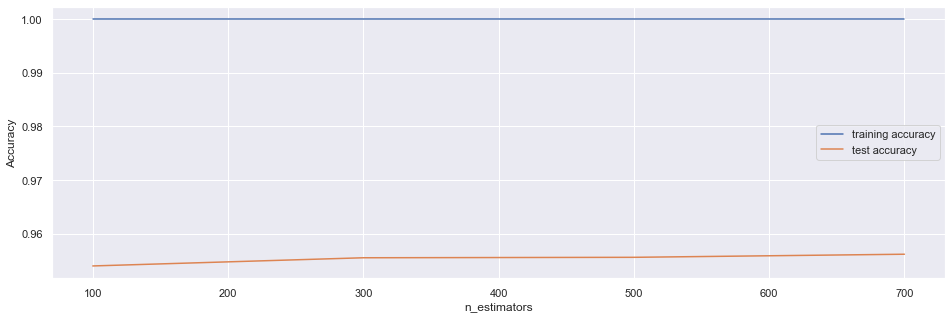

In [101]:
# Random Forest Classifier Tuning 3: parameters = {'n_estimators': range(100, 800, 200)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'n_estimators': range(100, 800, 200)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

#Evaluate Metrics
evaluate_model_metric(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

#Plot the graph for train and test accuracy
for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
##### n_estimators seems to be almost constant lets take 200

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9113120736157385
Test Confusion Matrix:
[[5506  276]
 [ 283  238]]
Sensitivity: 0.46
Specificity: 0.95
Recall Score: 0.46
Precision Score: 0.46
ROC AUC: 0.7
F1 Score: 0.46


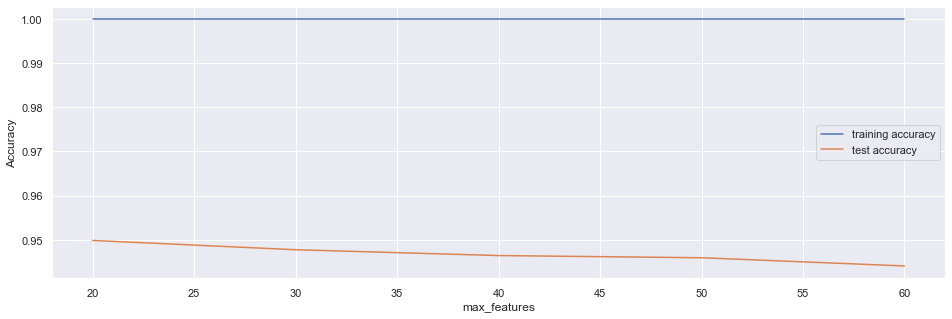

In [102]:
#Random Forest Classifier Tuning 4:- parameters = {'max_features': [20,30,40,50,60]}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_features': [20,30,40,50,60]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)
#Evaluate Metrics
evaluate_model_metric(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)
#Plot the graph for train and test accuracy
for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
##### As after 40, the graph started declining more, we will take max features as 40 

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Train Accuracy : 1.0
Train Confusion Matrix:
[[13490     0]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.914802475011899
Test Confusion Matrix:
[[5554  228]
 [ 309  212]]
Sensitivity: 0.41
Specificity: 0.96
Recall Score: 0.41
Precision Score: 0.48
ROC AUC: 0.68
F1 Score: 0.44


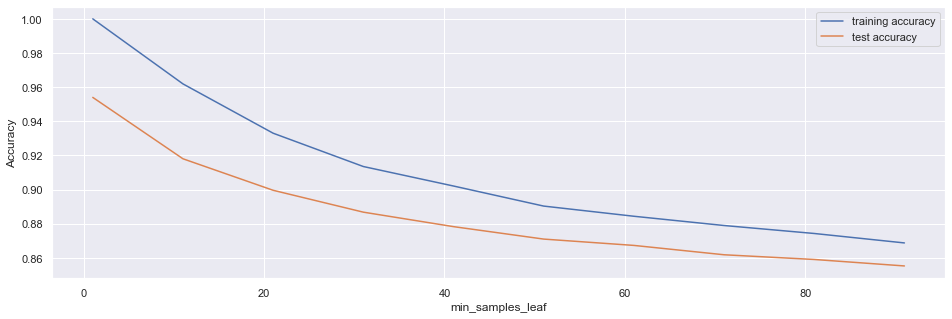

In [103]:
# Random Forest Classifier Tuning 5: parameters = {'min_samples_leaf': range(1, 100, 10)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'min_samples_leaf': range(1, 100, 10)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

#Evaluate Metrics
evaluate_model_metric(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

#Plot the graph for train and test accuracy
for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
##### Model may start to overfit as accuracy is decreasing with min sample leaf. Lets consider min sample leaf as 10 or 20

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Train Accuracy : 0.9982703236965653
Train Confusion Matrix:
[[13458    32]
 [   10 10782]]
--------------------------------------------------
Test Accuracy : 0.9121053466603205
Test Confusion Matrix:
[[5528  254]
 [ 300  221]]
Sensitivity: 0.42
Specificity: 0.96
Recall Score: 0.42
Precision Score: 0.47
ROC AUC: 0.69
F1 Score: 0.44


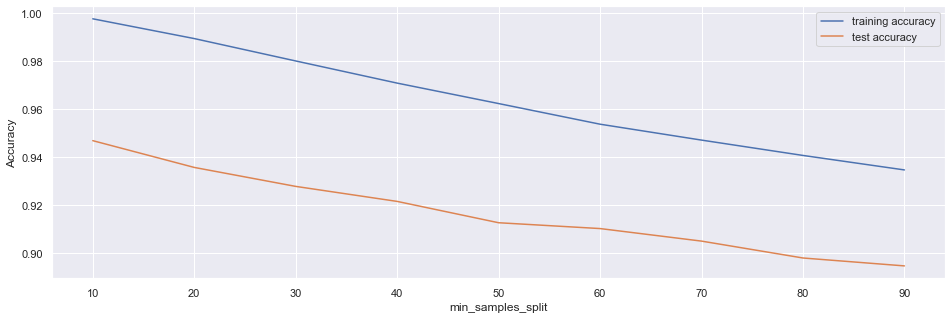

In [104]:
# Random Forest Classifier Tuning 6: - parameters = {'min_samples_split': range(10, 100, 10)}

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'min_samples_split': range(10, 100, 10)
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train_smote_pca, y_smote)

evaluate_model_metric(grid_search,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(grid_search.cv_results_)

for key in params.keys():
    hyperparameters = key
    break
plt.figure(figsize=(16,5))
plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
plt.xlabel(hyperparameters)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Insights:
##### As plot started decreasing after 40, let consider min_samples_split as 40 

In [105]:
# Random Forest Classifier Tuning 7: parameters = # Final Model after all the tuning

rf = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [12],
    'n_estimators' : [200],
    'max_features' : [40],
    'min_samples_leaf' : [10,20],
    'min_samples_split' : [40]
}

rf_final_model = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
rf_final_model.fit(x_train_smote_pca, y_smote)

evaluate_model_metric(rf_final_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)
scores = pd.DataFrame(rf_final_model.cv_results_)


Fitting 4 folds for each of 2 candidates, totalling 8 fits
Train Accuracy : 0.9415204678362573
Train Confusion Matrix:
[[12683   807]
 [  613 10179]]
--------------------------------------------------
Test Accuracy : 0.8978264318578455
Test Confusion Matrix:
[[5321  461]
 [ 183  338]]
Sensitivity: 0.65
Specificity: 0.92
Recall Score: 0.65
Precision Score: 0.42
ROC AUC: 0.78
F1 Score: 0.51


#### Insights of Random Forest Models:
##### Consider below metrics, this model seems to be good with best hyperparameters
###### > Train Accuracy: 94.29;  Test Accuracy: 89.5;  Recall Score: 0.65; and Precision Score: 0.41

<h5><a id="MODEL_5_ADABOOST">Model 5 : AdaBoost</a></h5> 

In [106]:
#Using adaBoosting to predict 'Churn Prob' 
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(x_train_smote_pca, y_smote)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [107]:
display('Accuracy of the Train model is:  ',accuracy_score(y_smote, adaboost.predict(x_train_smote_pca)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(x_test_smote_pca)))
evaluate_model_metric(adaboost,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

'Accuracy of the Train model is:  '

0.8875710402767482

'Accuracy of the Test model is:  '

0.8660955100745676

Train Accuracy : 0.8875710402767482
Train Confusion Matrix:
[[12095  1395]
 [ 1335  9457]]
--------------------------------------------------
Test Accuracy : 0.8660955100745676
Test Confusion Matrix:
[[5122  660]
 [ 184  337]]
Sensitivity: 0.65
Specificity: 0.89
Recall Score: 0.65
Precision Score: 0.34
ROC AUC: 0.77
F1 Score: 0.44


<h5><a id="Model_6_Adaboost_without_using_PCA">Model 6 : ADABOOST without using PCA</a></h5>

In [108]:
#Using xtrain and ytrain without PCA, build ADABOOST
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [109]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, adaboost.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, adaboost.predict(xtest)))
evaluate_model_metric(adaboost,ytrain,ytest,xtrain,xtest)

'Accuracy of the Train model is:  '

0.9471644226846185

'Accuracy of the Test model is:  '

0.9370141202601936

Train Accuracy : 0.9471644226846185
Train Confusion Matrix:
[[13234   256]
 [  521   695]]
--------------------------------------------------
Test Accuracy : 0.9370141202601936
Test Confusion Matrix:
[[5665  117]
 [ 280  241]]
Sensitivity: 0.46
Specificity: 0.98
Recall Score: 0.46
Precision Score: 0.67
ROC AUC: 0.72
F1 Score: 0.55


<h5><a id="Model_7_ADABOOST_without_using_PCA_and_with_Hyperparameter_Tuning">Model 7 : ADABOOST without using PCA and with Hyperparameter Tuning</a></h5>

In [110]:
##Using xtrain and ytrain without PCA, build ADABOOST with hyperparameter tuning
params = {
        'n_estimators' : [50,100, 200], # no of trees   # eta
        'algorithm': ['SAMME', 'SAMME.R'],
        }

folds = 5

param_comb = 800

random_search_ada = RandomizedSearchCV(adaboost, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search_ada.fit(xtrain, ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=1),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=3)

In [111]:
display('Accuracy of the Train model is:  ',accuracy_score(ytrain, random_search_ada.predict(xtrain)))
display('Accuracy of the Test model is:  ',accuracy_score(ytest, random_search_ada.predict(xtest)))
evaluate_model_metric(random_search_ada,ytrain,ytest,xtrain,xtest)

'Accuracy of the Train model is:  '

0.94281245750034

'Accuracy of the Test model is:  '

0.9381247025226083

Train Accuracy : 0.94281245750034
Train Confusion Matrix:
[[13230   260]
 [  581   635]]
--------------------------------------------------
Test Accuracy : 0.9381247025226083
Test Confusion Matrix:
[[5669  113]
 [ 277  244]]
Sensitivity: 0.47
Specificity: 0.98
Recall Score: 0.47
Precision Score: 0.68
ROC AUC: 0.72
F1 Score: 0.56


In [112]:
display('Best estimator:',random_search_ada.best_estimator_)
display('Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb),random_search_ada.best_score_)
display('Best hyperparameters:',random_search_ada.best_params_)


'Best estimator:'

AdaBoostClassifier(algorithm='SAMME', n_estimators=200, random_state=1)

'Best accuracy for 5-fold search with 800 parameter combinations:'

0.9399567658627838

'Best hyperparameters:'

{'n_estimators': 200, 'algorithm': 'SAMME'}

#### Insights:
##### Best Accuracy that we got from adaboost (without PCA) is 94.28% on train and 93.8% percent on test data. Both are very closer
##### Recall score of 47% and precision score of 68%

<h5><a id="MODEL_8_XGBOOST">Model 8: XGBOOST</a></h5>

In [113]:
### XG Boost - Model 1 
# fit model on training data with default hyperparameters

XGB_model = XGBClassifier()
XGB_model.fit(x_train_smote_pca, y_smote)
evaluate_model_metric(XGB_model,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Train Accuracy : 0.9993410756939297
Train Confusion Matrix:
[[13474    16]
 [    0 10792]]
--------------------------------------------------
Test Accuracy : 0.9095668729176583
Test Confusion Matrix:
[[5455  327]
 [ 243  278]]
Sensitivity: 0.53
Specificity: 0.94
Recall Score: 0.53
Precision Score: 0.46
ROC AUC: 0.74
F1 Score: 0.49


<h5><a id="Model_9_XGBOOST_with_Hyperparameter_Tuning">Model 9: XGBOOST with Hyperparameter Tuning</a></h5>

In [114]:
# hyperparameter tuning with XGBoost

# creating a KFold object with 5 folds
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model_tune = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model_tune, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(x_train_smote_pca, y_smote)
evaluate_model_metric(model_cv,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Accuracy : 0.9222881146528292
Train Confusion Matrix:
[[12417  1073]
 [  814  9978]]
--------------------------------------------------
Test Accuracy : 0.8818023163572902
Test Confusion Matrix:
[[5214  568]
 [ 177  344]]
Sensitivity: 0.66
Specificity: 0.9
Recall Score: 0.66
Precision Score: 0.38
ROC AUC: 0.78
F1 Score: 0.48


In [115]:
# displaying the best accuracy score and hyperparameters
print('We  get best score of '+str(round(model_cv.best_score_,2)) +' using parameters '+str(model_cv.best_params_))

We  get best score of 0.9 using parameters {'learning_rate': 0.3, 'subsample': 0.5}


In [116]:
# tune model with best hyperparameter values
param = {'learning_rate': 0.3,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.4,
          'gamma': 1,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_tune_2 = XGBClassifier(params = param,max_depth=2, n_estimators=200,min_child_weight=1,scale_pos_weight = 1)
xgb_model_tune_2.fit(x_train_smote_pca, y_smote)
evaluate_model_metric(xgb_model_tune_2,y_smote,ytest,x_train_smote_pca,x_test_smote_pca)

[21:59:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.

Train Accuracy : 0.9217115558850177
Train Confusion Matrix:
[[12398  1092]
 [  809  9983]]
--------------------------------------------------
Test Accuracy : 0.8835475170553705
Test Confusion Matrix:
[[5224  558]
 [ 176  345]]
Sensitivity: 0.66
Specificity: 0.9
Recall Score: 0.66
Precision Score: 0.38
ROC AUC: 0.78
F1 Score: 0.48


#### Insights:
##### XGBBOOST (with PCA and hyperparameter tuning) is giving good accuracy and recall score as compared to others but instead of using one model we will use combination of Multiple models

<h4><a id="Derive_output_of_all_models_and_predict_test_data_based_on_the_combination">Derive output of all models and predict test data based on the combination</a></h4>

### XGBOOST

In [117]:
test_v1.shape

(30000, 174)

In [121]:
# XGBOOOST
churn_probability_XGB = xgb_model_tune_2.predict(test_v1_scaled_pca)
csvdata = {'id':test['id'],'churn_probability_xgboost':churn_probability_XGB}
df = pd.DataFrame(csvdata)
display(df.shape)

(30000, 2)

In [122]:
#find the churn prob value count
df['churn_probability_xgboost'].value_counts()

0    29999
1        1
Name: churn_probability_xgboost, dtype: int64

### Logistic Regression

In [123]:
# Logistic Regression
churn_probability_logistic = lr_hp.predict(test_v1_scaled_pca)
df['churn_probability_logistic'] = pd.DataFrame(churn_probability_logistic,columns=['churn_probability_logistic'])
display(df.shape)

(30000, 3)

In [124]:
df['churn_probability_logistic'].value_counts()

0    25849
1     4151
Name: churn_probability_logistic, dtype: int64

### Random Forest

In [125]:
# Random Forest Final model with hyperparater tuning
churn_probability_randomforest = rf_final_model.predict(test_v1_scaled_pca)
df['churn_probability_randomforest'] = pd.DataFrame(churn_probability_randomforest,columns=['churn_probability_randomforest'])
display(df.shape)


(30000, 4)

In [126]:
df['churn_probability_randomforest'].value_counts()

0    29873
1      127
Name: churn_probability_randomforest, dtype: int64

In [127]:
test_v1.shape

(30000, 174)

In [129]:
#Print churn probability of different model for respective id
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest
0,69999,0,0,0
1,70000,0,0,0
2,70001,0,0,0
3,70002,0,0,0
4,70003,0,1,0


### Adaboost

In [130]:
# Adaboost without PCA
churn_probability_adaboost = random_search_ada.predict(test_v1)
df['churn_probability_adaboost'] = pd.DataFrame(churn_probability_adaboost,columns=['churn_probability_adaboost'])
display(df.shape)


(30000, 5)

In [131]:
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest,churn_probability_adaboost
0,69999,0,0,0,0
1,70000,0,0,0,0
2,70001,0,0,0,1
3,70002,0,0,0,0
4,70003,0,1,0,0


In [132]:
df['churn_probability_adaboost'].value_counts()

0    27822
1     2178
Name: churn_probability_adaboost, dtype: int64

In [133]:
#Sum up all churn prob
df['total_churn'] = df['churn_probability_xgboost'] + df['churn_probability_adaboost'] + df['churn_probability_randomforest']

In [139]:
#Derive final churn prob: if value is more than 1 then 1 else 0; Conisdering if two or more model results 1 then 1
df['Total_Case1'] = df['total_churn'].apply(lambda x : 1 if x>1 else 0)

In [140]:
df['Total_Case1'].value_counts()

0    29941
1       59
Name: Total_Case1, dtype: int64

In [142]:
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest,churn_probability_adaboost,total_churn,Total_Case1
0,69999,0,0,0,0,0,0
1,70000,0,0,0,0,0,0
2,70001,0,0,0,1,1,0
3,70002,0,0,0,0,0,0
4,70003,0,1,0,0,0,0


In [144]:
#Execute command to export the results of test data
df[['id','Total_Case1']].to_csv('final_model.csv',index=False)

##### In order to improve further accuracy lets build another set of models on train data directly instead of spliting 
- we will again use these models in linear combination

<h2><a id="Case_2">Case 2</a></h2>

<h3><a id="Apply_Algorithms_on_X_and_Y_train_directly">Apply Algorithms on X and Y train directly</a></h3>

In [146]:
trainX = X.copy()
trainY = Y.copy()

display(trainX.shape,trainY.shape)

(21009, 174)

(21009,)

In [147]:
# Aggregating the Categorical Columns

Dtrain = pd.concat([trainX, trainY], axis=1)

# aggregate the categorical variables
display(Dtrain.groupby('night_pck_user_6').churn_probability.mean())
display(Dtrain.groupby('night_pck_user_7').churn_probability.mean())
display(Dtrain.groupby('night_pck_user_8').churn_probability.mean())
display(Dtrain.groupby('fb_user_6').churn_probability.mean())
display(Dtrain.groupby('fb_user_7').churn_probability.mean())
display(Dtrain.groupby('fb_user_8').churn_probability.mean())



night_pck_user_6
-1.0    0.099925
 0.0    0.067941
 1.0    0.109091
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.116903
 0.0    0.056424
 1.0    0.062500
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.142189
 0.0    0.030350
 1.0    0.029412
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.099925
 0.0    0.080432
 1.0    0.068025
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.116903
 0.0    0.070099
 1.0    0.055439
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.142189
 0.0    0.076923
 1.0    0.024883
Name: churn_probability, dtype: float64

In [148]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099925, 0: 0.067941, 1: 0.109091},
           'night_pck_user_7' : {-1: 0.116903, 0: 0.056424, 1: 0.062500},
           'night_pck_user_8' : {-1: 0.142189, 0: 0.030350, 1: 0.029412},
           'fb_user_6'        : {-1: 0.099925, 0: 0.080432, 1: 0.068025},
           'fb_user_7'        : {-1: 0.116903, 0: 0.070099, 1: 0.055439},
           'fb_user_8'        : {-1: 0.142189, 0: 0.076923, 1: 0.024883}
          }
trainX.replace(mapping, inplace = True)

<h4><a id='Feature_Scaling_1'>Data Scaling</a><br></h4>

In [149]:
#Scaling on entire set 

# Scaling the data - Using Standard Scaler
col = list(trainX.columns)
# Data Scaling
scaler1 = StandardScaler()
trainX_scaled = scaler1.fit_transform(trainX)
testX_v1_scaled = scaler1.transform(test_v1)

# Applying Principal Component Analysis
pca = PCA()
pca.fit(trainX)
trainx_pca = pca.fit_transform(trainX_scaled)

### PCA

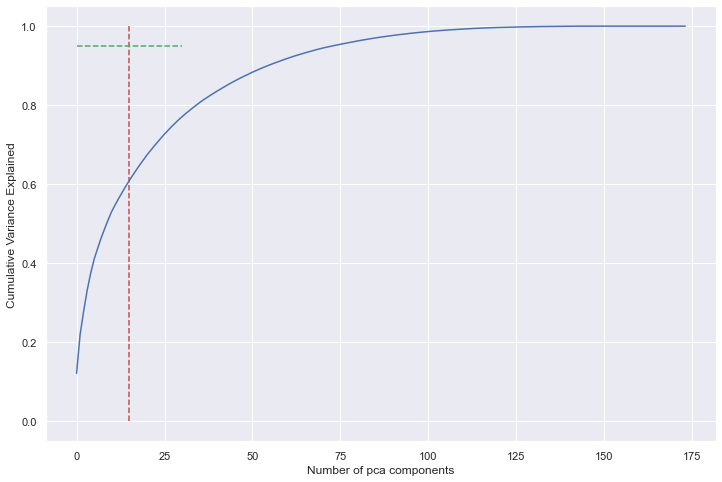

In [150]:
#  Plot variance Graph
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Number of pca components")
plt.show()

In [151]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.113314,0.067659,0.065019,arpu_6
1,0.118059,0.079850,0.133270,arpu_7
2,0.102283,0.108752,0.180893,arpu_8
3,0.113915,-0.038342,0.060504,onnet_mou_6
4,0.118617,-0.033978,0.098613,onnet_mou_7
5,0.112570,-0.011811,0.133405,onnet_mou_8
6,0.135181,0.016307,0.025866,offnet_mou_6
7,0.141194,0.020370,0.073290,offnet_mou_7
8,0.130753,0.046441,0.114154,offnet_mou_8
9,0.026591,0.010904,0.052641,roam_ic_mou_6


In [152]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.18, 21.93, 27.82, 33.1 , 37.43, 41.05, 43.8 , 46.44, 48.8 ,
       51.06, 53.14, 54.84, 56.46, 58.01, 59.54, 60.97, 62.33, 63.66,
       64.95, 66.19, 67.4 , 68.52, 69.61, 70.66, 71.69, 72.71, 73.67,
       74.59, 75.47, 76.33, 77.11, 77.89, 78.62, 79.33, 80.02, 80.7 ,
       81.34, 81.93, 82.51, 83.08, 83.63, 84.16, 84.69, 85.2 , 85.7 ,
       86.18, 86.64, 87.09, 87.52, 87.95, 88.36, 88.77, 89.16, 89.54,
       89.91, 90.26, 90.6 , 90.93, 91.26, 91.58, 91.88, 92.18, 92.48,
       92.75, 93.01, 93.27, 93.52, 93.77, 94.01, 94.25, 94.47, 94.67,
       94.86, 95.05, 95.24, 95.42, 95.6 , 95.77, 95.94, 96.11, 96.28,
       96.44, 96.59, 96.74, 96.89, 97.03, 97.17, 97.3 , 97.43, 97.55,
       97.67, 97.78, 97.89, 97.99, 98.09, 98.19, 98.29, 98.38, 98.47,
       98.56, 98.64, 98.72, 98.8 , 98.87, 98.93, 98.99, 99.05, 99.11,
       99.17, 99.22, 99.27, 99.32, 99.37, 99.42, 99.46, 99.5 , 99.54,
       99.57, 99.6 , 99.63, 99.66, 99.69, 99.72, 99.74, 99.76, 99.78,
       99.8 , 99.82,

<h4><a id="Handle_Imbalance_Dataset_Using_SMOTE_1">Handling Class Imbalance using SMOTE</a></h4>

In [153]:
smote = SMOTE(.8)
trainX_smote,trainY_smote = smote.fit_sample(trainX_scaled,trainY)
display("Shape of train datatset after SMOTE : "+ str(trainX_smote.shape))

# Applying Incremental PCA
pca = IncrementalPCA(n_components=80)    
trainX_smote_pca = pca.fit_transform(trainX_smote)
testX_v1_scaled_pca = pca.transform(testX_v1_scaled)

'Shape of train datatset after SMOTE : (34689, 174)'

In [154]:
display("Shape of train datatset after PCA : "+str(trainX_smote_pca.shape))
from collections import Counter

display(Counter(trainY))
display(Counter(trainY_smote))

'Shape of train datatset after PCA : (34689, 80)'

Counter({0: 19272, 1: 1737})

Counter({0: 19272, 1: 15417})

<h4><a id="Created_below_models_on_entire_train_set">Model Creation</a></h4>
<h5><a id="Random_Forest_1">Random Forest</a></h5>

In [156]:
# Random Forest Classifier - using same hyperparameters that we derived before on tain set

cv = KFold(n_splits=4, shuffle=True, random_state=1)

rf_test = RandomForestClassifier(random_state=42, n_jobs=-1,oob_score=True)
params = {
    'max_depth': [12],
    'min_samples_split' : [40],
    'min_samples_leaf' : [10,20],
    'max_features' : [40],
    'n_estimators' : [200]
}

rf_final_model = GridSearchCV(estimator=rf_test,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy",return_train_score=True)
rf_final_model.fit(trainX_smote_pca, trainY_smote)

scores = pd.DataFrame(rf_final_model.cv_results_)



Fitting 4 folds for each of 2 candidates, totalling 8 fits


In [158]:
display("Train Accuracy:", accuracy_score(trainY_smote, rf_final_model.predict(trainX_smote_pca)))
display("Train Confusion Matrix:",confusion_matrix(trainY_smote, rf_final_model.predict(trainX_smote_pca)))

'Train Accuracy:'

0.9376459396350428

'Train Confusion Matrix:'

array([[18109,  1163],
       [ 1000, 14417]], dtype=int64)

<h5><a id="AdaBoost_1">AdaBoost</a></h5>

In [159]:
#Using adaBoosting
adaboost_1 =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost_1.fit(trainX, trainY)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [160]:
display('Accuracy of the Train model is:  ',accuracy_score(trainY, adaboost_1.predict(trainX)))

'Accuracy of the Train model is:  '

0.944642772145271

In [163]:
# Adaboost with Hyperparameter Tuning
param = {
        'n_estimators' : [50,100, 200], 
        'algorithm': ['SAMME', 'SAMME.R'],
        }

cv = KFold(n_splits=5, shuffle=True, random_state=1)

param_comb = 800

random_search_ada_1 = RandomizedSearchCV(adaboost_1, param_distributions=param, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=cv, verbose=3, random_state=42)
random_search_ada_1.fit(trainX, trainY)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(n_estimators=200,
                                                random_state=1),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=3)

In [164]:
display('Accuracy of the Train model is:  ',accuracy_score(trainY, random_search_ada_1.predict(trainX)))

'Accuracy of the Train model is:  '

0.941834451901566

<h5><a id="XGBOOST_1">XGBOOST</a></h5>

In [165]:
### XG Boost Model-1: fit model on training data with default hyperparameters

xgb_model = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1,learning_rate=.3,subsample=.5)
xgb_model.fit(trainX_scaled, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [166]:
# Model 2: hyperparameter tuning with XGBoost

# creating a KFold object 
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# 'min_child_weight': [1, 5, 7, 10],
# 'gamma': [0.1, 0.5, 1, 1.5, 5]
# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]
             }          


# specify model
xgb_model_1 = XGBClassifier(max_depth=2, n_estimators=200,n_jobs=-1)

# set up GridSearchCV()
model_cv_1 = GridSearchCV(estimator = xgb_model_1, 
                        param_grid = param_grid, 
                        scoring= 'accuracy',
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv_1.fit(trainX_smote_pca, trainY_smote)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     m

In [168]:
# displaying the best accuracy score and hyperparameters
display('We  get best score of '+str(round(model_cv_1.best_score_,2)) +' using parameters: '+str(model_cv_1.best_params_))

"We  get best score of 0.89 using parameters: {'learning_rate': 0.3, 'subsample': 0.4}"

In [169]:
# Model 3: with best score related hyperparameters
param = {'learning_rate': 0.3,
          'subsample':0.4,
          'max_depth': 3, 
          'n_estimators':200,          
          'gamma': 1,
         'objective':'binary:logistic'}

# fit model on training data
XGBmodel_2 = XGBClassifier(params = param,max_depth=2, n_estimators=200,min_child_weight=1,scale_pos_weight = 1)
XGBmodel_2.fit(trainX_smote_pca, trainY_smote)

display('Accuracy of the Train model is:  ',accuracy_score(trainY_smote, XGBmodel_2.predict(trainX_smote_pca)))

[22:52:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



'Accuracy of the Train model is:  '

0.9095678745423621

<h5><a id="Predict_test_results_based_on_multiple_model_outputs">Predict test results based on multiple model outputs</a></h5>

In [172]:
# Random Forest 
churn_probability_randomforest_1 = rf_final_model.predict(testX_v1_scaled_pca)
df['churn_probability_randomforest_1'] = pd.DataFrame(churn_probability_randomforest_1,columns=['churn_probability_randomforest_1'])
display(df.shape)


(30000, 9)

In [173]:
# XGBOOST 
churn_XGBOOST_1 = XGBmodel_2.predict(testX_v1_scaled_pca)
df['churn_XGBOOST_1'] = pd.DataFrame(churn_XGBOOST_1,columns=['churn_XGBOOST_1'])
display(df.shape)

(30000, 10)

In [174]:
#ADABOOST
churn_probability_adaboost_1 = random_search_ada_1.predict(test_v1)
df['churn_probability_adaboost_1'] = pd.DataFrame(churn_probability_adaboost_1,columns=['churn_probability_adaboost_1'])
display(df.shape)

(30000, 11)

In [177]:
df.head()

,id,churn_probability_xgboost,churn_probability_logistic,churn_probability_randomforest,churn_probability_adaboost,total_churn,Total_Case1,churn_probability_randomforest_1,churn_XGBOOST_1,churn_probability_adaboost_1
0,69999,0,0,0,0,0,0,0,0,0
1,70000,0,0,0,0,0,0,0,0,0
2,70001,0,0,0,1,1,0,0,0,1
3,70002,0,0,0,0,0,0,0,0,0
4,70003,0,1,0,0,0,0,0,0,0


### Follow same method to compute final chrun probability as in previous method

In [179]:
df['total_churn_1'] = df['churn_XGBOOST_1'] + df['churn_probability_adaboost_1'] + df['churn_probability_randomforest_1']

In [180]:
df['Total_Case2'] = df['total_churn_1'].apply(lambda x : 1 if x>1 else 0)

### Final total sum and further derive the churn probability

In [182]:
df['Total_sum'] = df['Total_Case2'] + df['Total_Case1']

In [183]:
df['churn_probability'] = df['Total_sum'].apply(lambda x : 1 if x>=1 else 0)

In [184]:
df['churn_probability'].value_counts()

0    29929
1       71
Name: churn_probability, dtype: int64

In [185]:
#Export to excel with final churn probability
df[['id','churn_probability']].to_csv('Submission.csv',index=False)

### Feature Importance using the Xgboost Model

In [186]:
xgb_model.feature_importances_

array([0.00580035, 0.00697219, 0.00522264, 0.00245783, 0.00520968,
       0.00710439, 0.00391755, 0.00368342, 0.00551714, 0.        ,
       0.00515534, 0.00534465, 0.00513043, 0.00451126, 0.01807566,
       0.00417708, 0.00487079, 0.00482656, 0.00477146, 0.00416375,
       0.00859037, 0.00494008, 0.00841419, 0.00783195, 0.00458536,
       0.00539613, 0.0048817 , 0.00492846, 0.0039984 , 0.00594827,
       0.00802058, 0.00660701, 0.00374301, 0.00487526, 0.00397225,
       0.00405025, 0.00431808, 0.        , 0.00335435, 0.00312041,
       0.0028907 , 0.01353951, 0.        , 0.        , 0.        ,
       0.00520313, 0.00401243, 0.0046016 , 0.0069737 , 0.        ,
       0.        , 0.0054371 , 0.00325695, 0.00702449, 0.00428863,
       0.0034281 , 0.00423555, 0.00400891, 0.0039257 , 0.01168548,
       0.00333813, 0.00538908, 0.00419664, 0.00402125, 0.00441708,
       0.01183165, 0.00438224, 0.00412395, 0.00391219, 0.003565  ,
       0.0052962 , 0.00469391, 0.00411684, 0.00491977, 0.00472

In [189]:
py.init_notebook_mode(connected=True) 

In [190]:
# Scatter plot
trace = go.Scatter(
y = xgb_model.feature_importances_, x = xtrain.columns.values, mode='markers',
marker=dict(
sizemode = 'diameter',
sizeref = 1.3,
size = 12,
color = xgb_model.feature_importances_, colorscale='Portland', showscale=True
),
text = xtrain.columns.values )
data = [trace]
layout= go.Layout( autosize= True,
title= 'XGBOOST Model Feature Importance', hovermode= 'closest',
xaxis= dict( ticklen= 5,
showgrid=False, zeroline=False, showline=False
), yaxis=dict(
title= 'Feature Importance', showgrid=False, zeroline=False,
ticklen= 5,
gridwidth= 2 ),
showlegend= False )
fig = go.Figure(data=data, layout=layout) 
py.iplot(fig,filename='scatter')

In [191]:
# Top 20 Features based on Feature Selection
#y = model_1.feature_importances_, x = xtrain.columns.values,
results = pd.DataFrame()
results['columns'] = xtrain.columns.values
results['importances'] = xgb_model.feature_importances_ *100
results.sort_values(by = 'importances', ascending = False, inplace=True)
results[:20]

,columns,importances
140,fb_user_8,8.425042
80,total_ic_mou_8,7.373121
95,total_rech_amt_8,2.657228
101,last_day_rch_amt_8,1.928844
14,roam_og_mou_8,1.807566
150,date_of_last_rech_data_8age,1.626946
116,av_rech_amt_data_8,1.599455
157,std_og_mou_diff,1.501350
167,total_rech_amt_diff,1.380293
41,std_og_mou_8,1.353951


<h5><a id="Conclusion">Conclusion</a></h5>
- Telecom company should provide good offers to the customers who are using services from a roaming zone.<br>
- Telecom company should provide some kind of STD and ISD packages to reduce churn rate.